In [ ]:
!pip install ydata_profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy import stats
from yellowbrick.cluster import KElbowVisualizer
from ydata_profiling import ProfileReport
import math

In [ ]:
# Conectar ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/FIA Analytics/Trabalho final/shopping_trends.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
# Informações básicas sobre os tipos de dados
print(f"Dataset shape: {df.shape}")
print("\nTipos de dados:")
print(df.dtypes)

Dataset shape: (3900, 19)

Tipos de dados:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object


In [ ]:
df.describe().round(2)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00
mean,1950.50,44.07,59.76,3.75,25.35
std,1125.98,15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,1950.50,44.00,60.00,3.70,25.00
75%,2925.25,57.00,81.00,4.40,38.00
max,3900.00,70.00,100.00,5.00,50.00


In [ ]:
profile = ProfileReport(df, title="Consumer info")
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Identificação das features categoricas
categorical_features = [
    'Gender',
    'Category',
    'Location',
    'Season',
    'Subscription Status',
    'Shipping Type',
    'Discount Applied',
    'Promo Code Used',
    'Payment Method',
    'Frequency of Purchases'
]

In [ ]:
# Identificação das features numericas
numerical_features = [
    'Age',
    'Purchase Amount (USD)',
    'Review Rating',
    'Previous Purchases'
]

In [ ]:
# Especificação da coluna Customer ID
customer_id_col = 'Customer ID'

In [ ]:
# Verificação dos recursos numéricos/categóricos identificados realmente existem no DataFrame
actual_numerical_features_eda = [col for col in numerical_features if col in df.columns]
actual_categorical_features_eda = [col for col in categorical_features if col in df.columns]

In [ ]:
#Resposta explicativa quantitativa vs. resposta qualitativa
# Crie uma função para boxplots
def boxplot_by_category(df, num_var, cat_var, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=cat_var, y=num_var, data=df)
    plt.title(f'{num_var} by {cat_var}')
    plt.xticks(rotation=45)
    plt.tight_layout()

# estatísticas descritivas por grupo
    stats_by_group = df.groupby(cat_var)[num_var].agg(['mean', 'median', 'std', 'min', 'max'])
    print(f"Statistics of {num_var} by {cat_var}:")
    print(stats_by_group.round(2))

    return stats_by_group

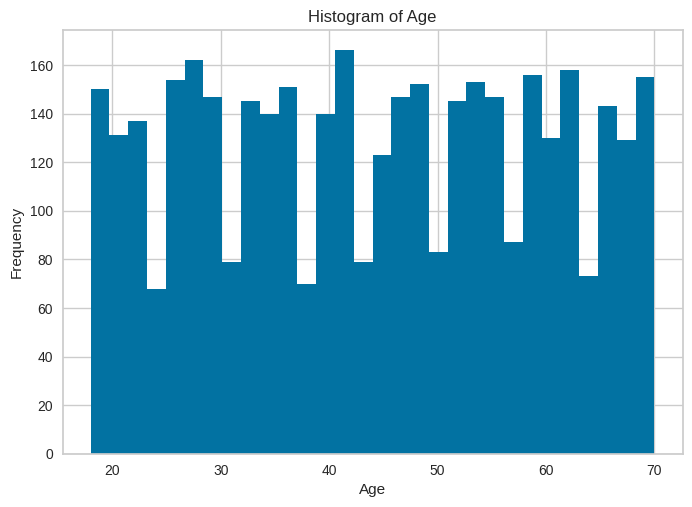

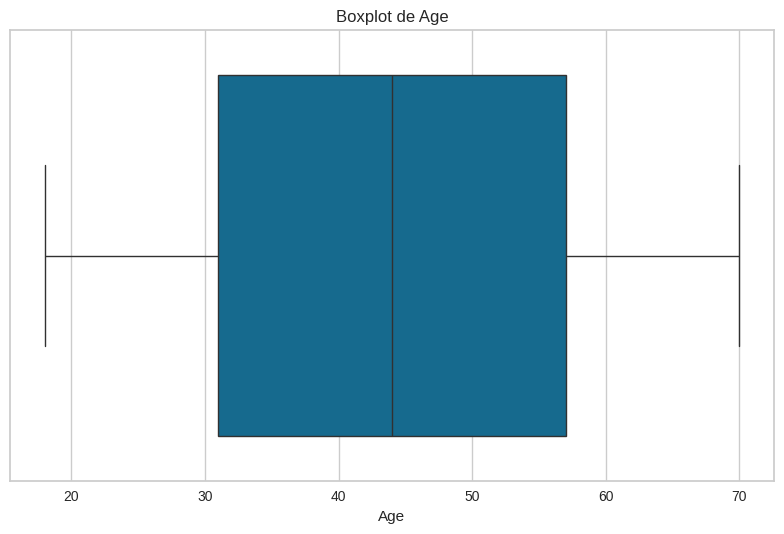

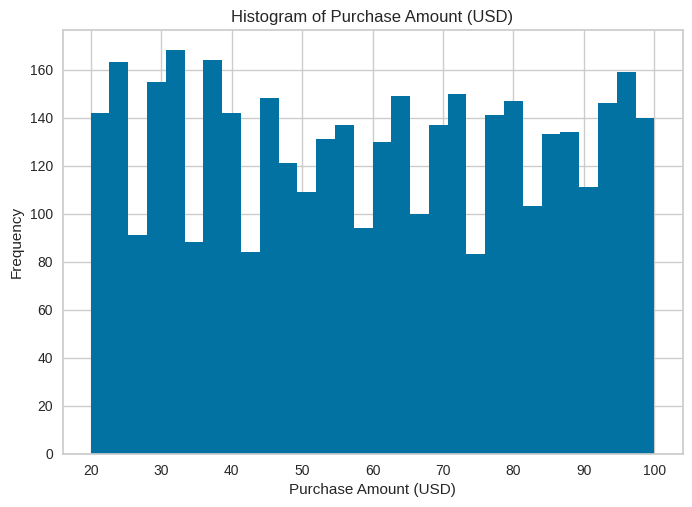

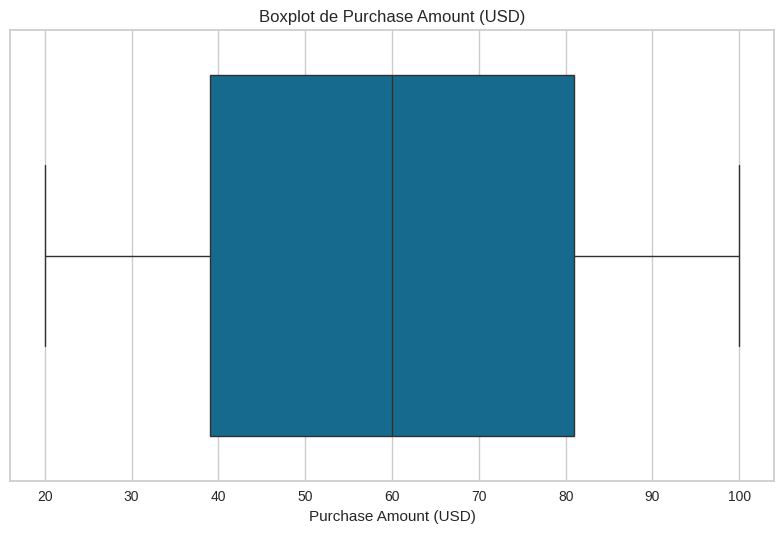

In [ ]:
# Histograms & boxplots
for col in ["Age", "Purchase Amount (USD)"]:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col); plt.ylabel("Frequency"); plt.show()

    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

Statistics of Purchase Amount (USD) by Category:
              mean  median    std  min  max
Category                                   
Accessories  59.84    60.0  23.30   20  100
Clothing     60.03    60.0  23.79   20  100
Footwear     60.26    60.0  23.64   20  100
Outerwear    57.17    54.5  24.59   20  100


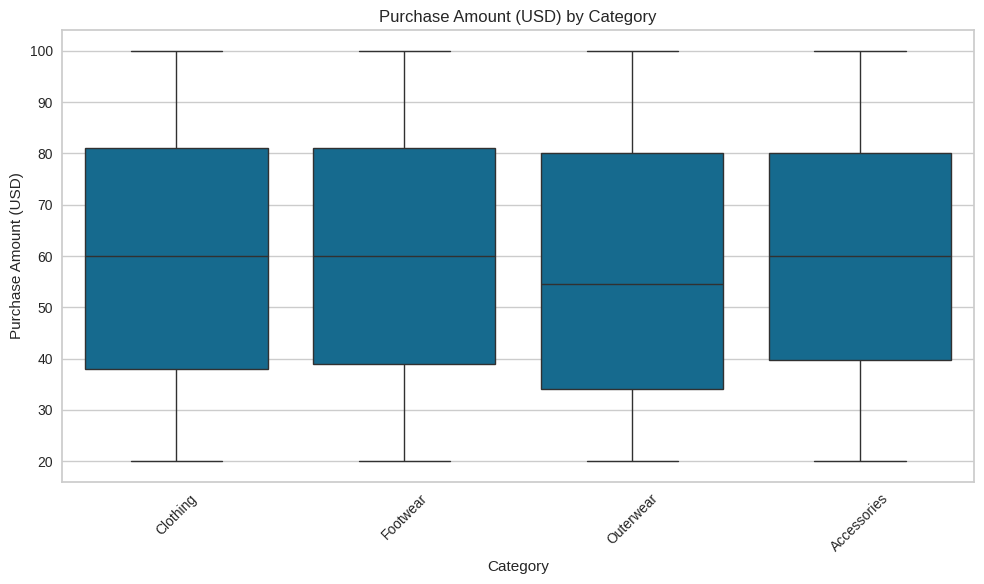

In [ ]:
# valor de compra por categoria
purchase_by_category = boxplot_by_category(df, 'Purchase Amount (USD)', 'Category')

/tmp/ipython-input-1466726164.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order, palette='viridis') # Use y=col para barras horizontais se houver muitas categorias
/tmp/ipython-input-1466726164.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order, palette='viridis') # Use y=col para barras horizontais se houver muitas categorias
/tmp/ipython-input-1466726164.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order, palette='viridis') # Use y=col para bar

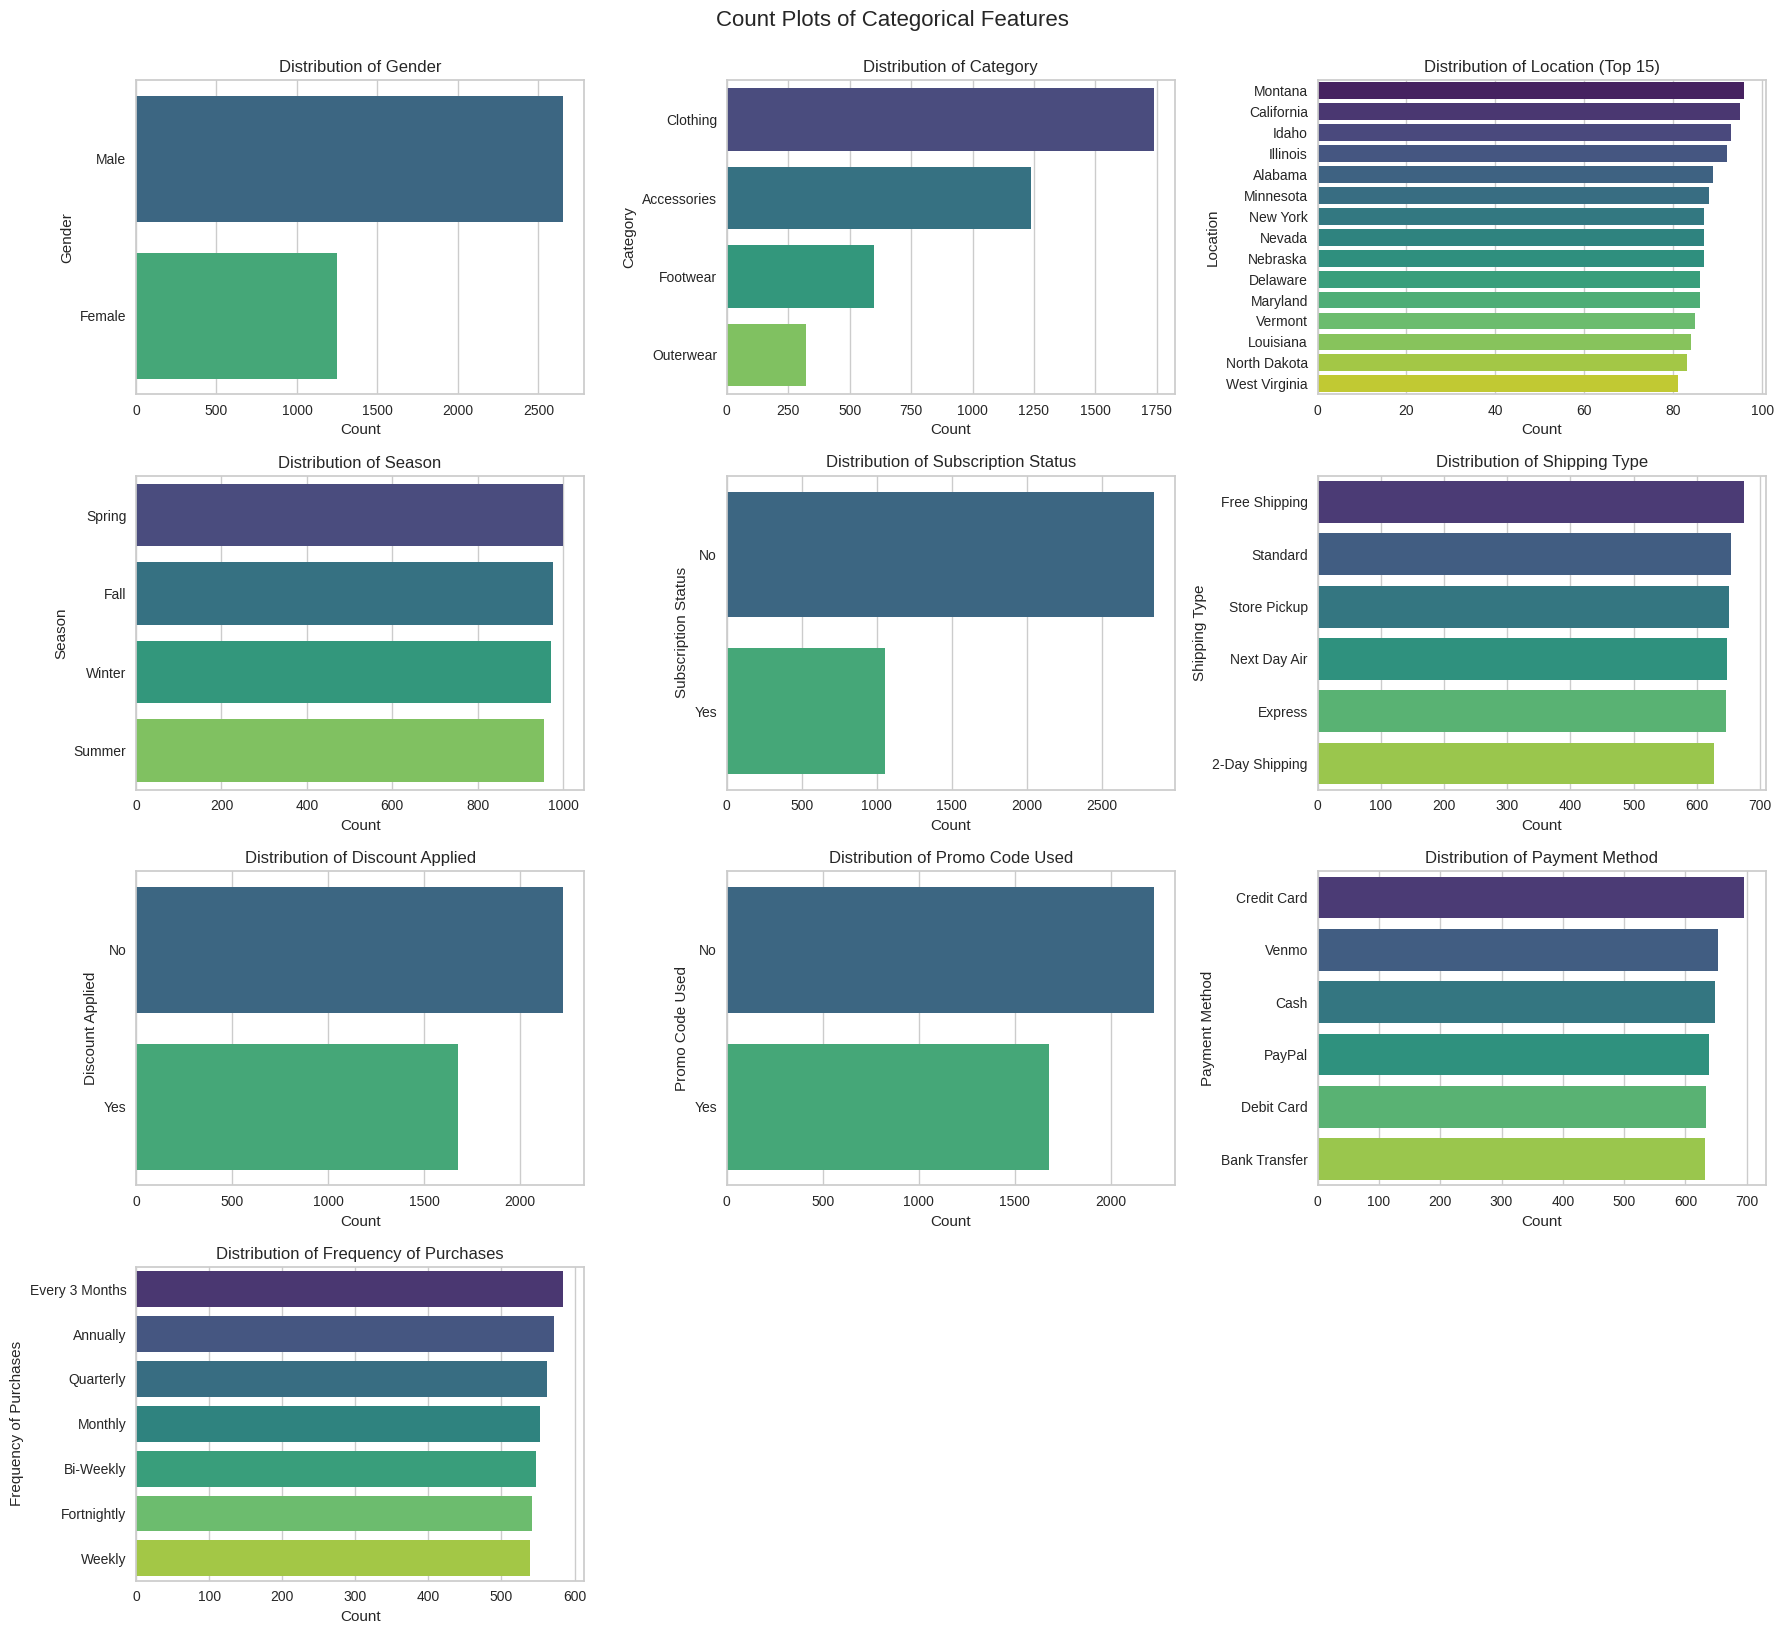

Displayed count plots for categorical features.


In [ ]:
# Count Plots (Bar Charts) for Categorical Features
if actual_categorical_features_eda:
    num_plots = len(actual_categorical_features_eda)
    if num_plots > 0:
        # Determine layout dynamically - aim for max 3 columns
        num_cols = min(3, num_plots)
        num_rows = math.ceil(num_plots / num_cols)
        plt.figure(figsize=(6 * num_cols, 4 * num_rows)) # ajuste o tamanho com base na grade
        for i, col in enumerate(actual_categorical_features_eda):
            plt.subplot(num_rows, num_cols, i + 1)
            # Use seaborn's countplot
            order = df[col].value_counts().index[:15] # Limite às 15 principais categorias para facilitar a leitura
            sns.countplot(data=df, y=col, order=order, palette='viridis') # Use y=col para barras horizontais se houver muitas categorias
            plt.title(f'Distribution of {col}')
            plt.xlabel('Count')
            plt.ylabel(col) # Rótulo correto para o eixo y
            if len(order) < df[col].nunique():
                 plt.title(f'Distribution of {col} (Top 15)') # Atualizar

        plt.tight_layout()
        plt.suptitle('Count Plots of Categorical Features', y=1.02, size=16)
        plt.show()
        print("Displayed count plots for categorical features.")
    else:
        print("No categorical features to plot count plots for.")



Tabela de Frequência: Gender vs Frequency of Purchases
Contagens Absolutas:
Frequency of Purchases  Annually  Bi-Weekly  Every 3 Months  Fortnightly  \
Gender                                                                     
Female                       185        188             186          163   
Male                         387        359             398          379   

Frequency of Purchases  Monthly  Quarterly  Weekly  
Gender                                              
Female                      185        169     172  
Male                        368        394     367  

Percentuais (por Linha - Gênero):
Frequency of Purchases  Annually  Bi-Weekly  Every 3 Months  Fortnightly  \
Gender                                                                     
Female                      14.8       15.1            14.9         13.1   
Male                        14.6       13.5            15.0         14.3   

Frequency of Purchases  Monthly  Quarterly  Weekly  
Gender       

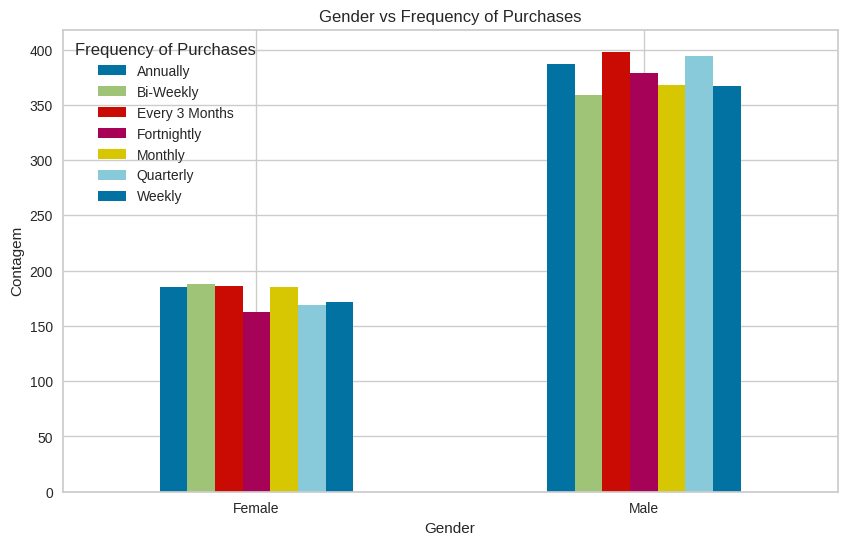

In [ ]:
 #Atributos Qualitativos vs. Atributos Qualitativos -> Tabelas de Frequência (Crosstabs)
# Exemplo: 'Gender' vs 'Frequency of Purchases'
if 'Gender' in df.columns and 'Frequency of Purchases' in df.columns:
    print("\nTabela de Frequência: Gender vs Frequency of Purchases")
    cross_tab_gf = pd.crosstab(df['Gender'], df['Frequency of Purchases'])
    print("Contagens Absolutas:")
    print(cross_tab_gf)
    print("\nPercentuais (por Linha - Gênero):")
    print(cross_tab_gf.apply(lambda r: r/r.sum()*100, axis=1).round(1))

    # Visualização da tabela de frequência
    cross_tab_gf.plot(kind='bar', stacked=False, figsize=(10,6))
    plt.title('Gender vs Frequency of Purchases')
    plt.ylabel('Contagem')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Não foi possível gerar tabela de frequência para 'Gender' vs 'Frequency of Purchases'.")


Gerando Boxplots: Atributos Qualitativos vs. Purchase Amount (USD)


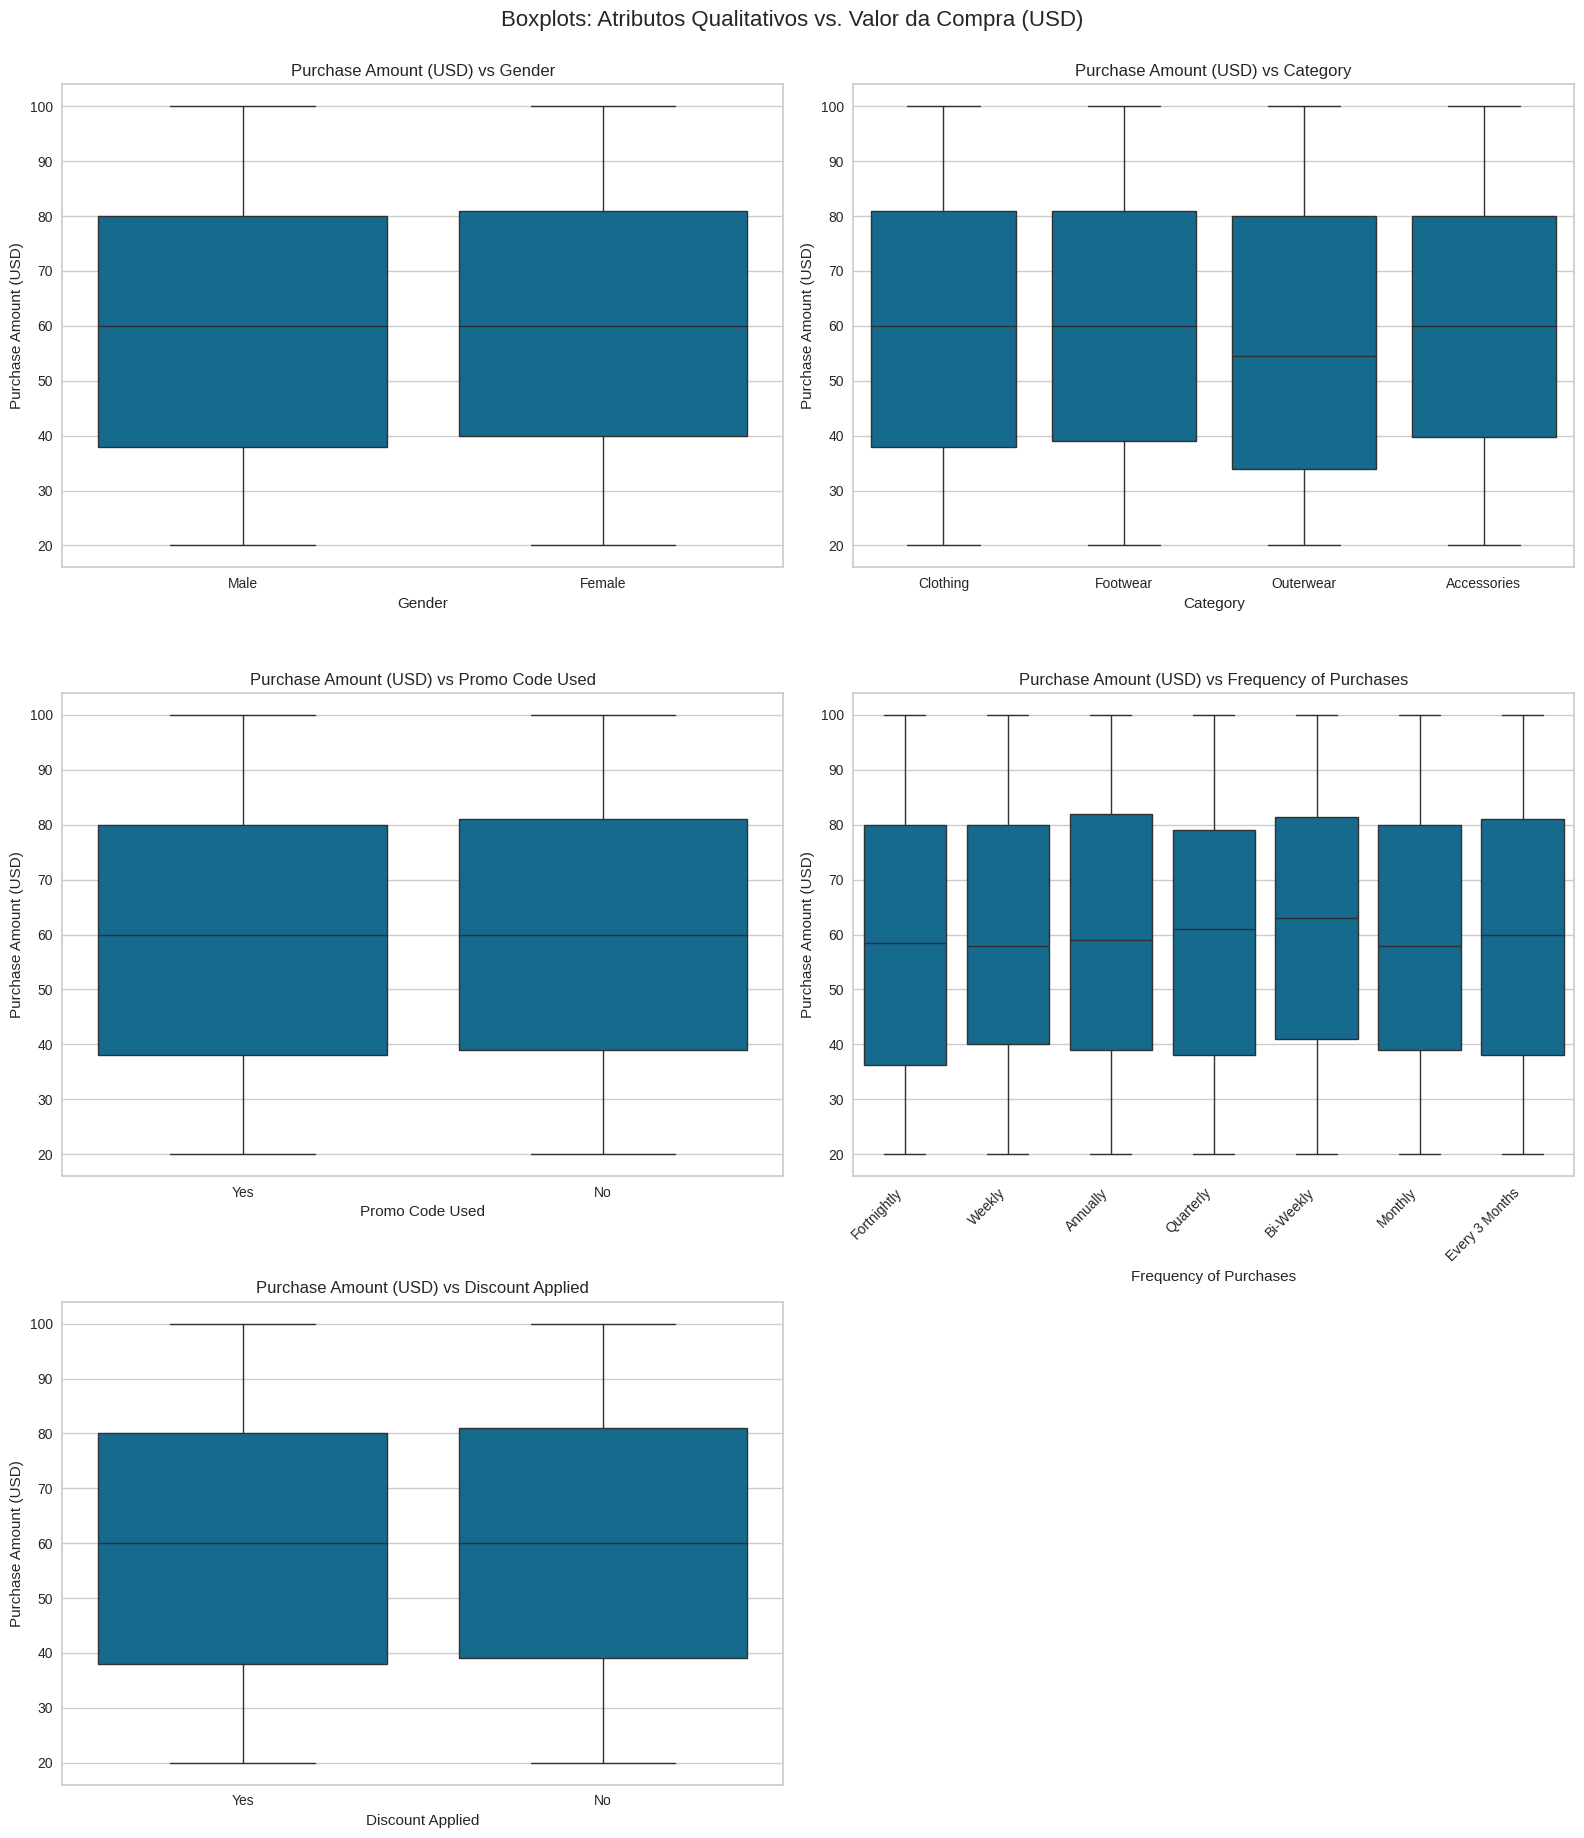

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# A. Atributos Qualitativos vs. 'Purchase Amount (USD)' (Quantitativa) -> Boxplots
# Selecionar atributos qualitativos chave (ajustado: trocado 'Location' por 'Discount Applied')
qual_features_for_bivariate = ['Gender', 'Category', 'Promo Code Used', 'Frequency of Purchases', 'Discount Applied']
# Filtrar para garantir que os atributos existem no DataFrame
qual_features_for_bivariate = [col for col in qual_features_for_bivariate if col in df.columns]

if 'Purchase Amount (USD)' in df.columns and qual_features_for_bivariate:
    print("\nGerando Boxplots: Atributos Qualitativos vs. Purchase Amount (USD)")
    num_plots = len(qual_features_for_bivariate)
    num_cols_viz = min(2, num_plots)
    num_rows_viz = math.ceil(num_plots / num_cols_viz)
    plt.figure(figsize=(8 * num_cols_viz, 6 * num_rows_viz))

    for i, col in enumerate(qual_features_for_bivariate):
        plt.subplot(num_rows_viz, num_cols_viz, i + 1)
        sns.boxplot(x=df[col], y=df['Purchase Amount (USD)'])
        plt.title(f'Purchase Amount (USD) vs {col}')
        if df[col].nunique() > 5:
            plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.suptitle('Boxplots: Atributos Qualitativos vs. Valor da Compra (USD)', y=1.02, fontsize=16)
    plt.show()
else:
    print("Não foi possível gerar boxplots: 'Purchase Amount (USD)' ou atributos qualitativos chave não encontrados.")


Início - Cluster

In [ ]:
!pip install feature-engine

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


**Objetivo do Projeto**

Desenvolver um modelo de clusterização de clientes para identificar grupos com comportamentos e perfis semelhantes, a fim de direcionar campanhas de marketing personalizadas.

Modelagem para o cluster

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from feature_engine.encoding import OneHotEncoder

In [ ]:
df= df.filter(['Customer ID','Age','Purchase Amount (USD)','Category',"Item Purchased",'Season','Promo Code Used','Discount Applied','Preferred Payment Method'])
df.head(3)

,Customer ID,Age,Purchase Amount (USD),Category,Item Purchased,Season,Promo Code Used,Discount Applied,Preferred Payment Method
0,1,55,53,Clothing,Blouse,Winter,Yes,Yes,Venmo
1,2,19,64,Clothing,Sweater,Winter,Yes,Yes,Cash
2,3,50,73,Clothing,Jeans,Spring,Yes,Yes,Credit Card


Modelagem perfil de compra

In [ ]:
bins = [0, 12, 17, 20, 24, 29, 34, 39, 44, 49, 54, 64, float('inf')]
labels = [
    'Infantil', 'Adolescente', 'Jovem menor de idade',
    'Jovem universitário', 'Jovem profissional', 'Adulto inicial',
    'Adulto médio', 'Adulto avançado', 'Meia-idade inicial',
    'Meia-idade avançada', 'Pré-idoso', 'Idoso'
]
df['FaixaEtaria'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [ ]:
bool_cols = ['Promo Code Used', 'Discount Applied']
for col in bool_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df.head()

,Customer ID,Age,Purchase Amount (USD),Category,Item Purchased,Season,Promo Code Used,Discount Applied,Preferred Payment Method,FaixaEtaria
0,1,55,53,Clothing,Blouse,Winter,1,1,Venmo,Pré-idoso
1,2,19,64,Clothing,Sweater,Winter,1,1,Cash,Jovem menor de idade
2,3,50,73,Clothing,Jeans,Spring,1,1,Credit Card,Meia-idade avançada
3,4,21,90,Footwear,Sandals,Spring,1,1,PayPal,Jovem universitário
4,5,45,49,Clothing,Blouse,Spring,1,1,PayPal,Meia-idade inicial


In [ ]:
df.dtypes

,0
Customer ID,int64
Age,int64
Purchase Amount (USD),int64
Category,object
Item Purchased,object
Season,object
Promo Code Used,int64
Discount Applied,int64
Preferred Payment Method,object
FaixaEtaria,category


Modelagem perfil de compra

In [ ]:
df_perfil_compra = pd.crosstab(df['FaixaEtaria'], df['Item Purchased'], normalize='index').reset_index()
df_perfil_compra

Item Purchased,FaixaEtaria,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
0,Jovem menor de idade,0.028302,0.056604,0.047170,0.037736,0.061321,0.056604,0.042453,0.037736,0.018868,...,0.042453,0.061321,0.033019,0.037736,0.056604,0.037736,0.042453,0.037736,0.070755,0.023585
1,Jovem universitário,0.021898,0.043796,0.036496,0.014599,0.051095,0.047445,0.043796,0.043796,0.047445,...,0.032847,0.040146,0.025547,0.043796,0.029197,0.051095,0.043796,0.029197,0.051095,0.065693
2,Jovem profissional,0.043367,0.043367,0.040816,0.040816,0.043367,0.033163,0.038265,0.033163,0.045918,...,0.043367,0.051020,0.033163,0.045918,0.061224,0.040816,0.035714,0.043367,0.033163,0.028061
3,Adulto inicial,0.063361,0.041322,0.046832,0.030303,0.041322,0.030303,0.044077,0.030303,0.030303,...,0.016529,0.055096,0.041322,0.046832,0.030303,0.035813,0.055096,0.044077,0.035813,0.055096
4,Adulto médio,0.044321,0.047091,0.047091,0.049861,0.022161,0.030471,0.044321,0.024931,0.052632,...,0.052632,0.049861,0.024931,0.027701,0.027701,0.036011,0.019391,0.036011,0.044321,0.036011
5,Adulto avançado,0.046196,0.038043,0.048913,0.032609,0.029891,0.051630,0.019022,0.035326,0.057065,...,0.065217,0.040761,0.027174,0.029891,0.024457,0.032609,0.040761,0.032609,0.029891,0.035326
6,Meia-idade inicial,0.018868,0.064690,0.024259,0.029650,0.051213,0.053908,0.035040,0.037736,0.021563,...,0.037736,0.037736,0.051213,0.056604,0.045822,0.040431,0.029650,0.037736,0.045822,0.035040
7,Meia-idade avançada,0.039370,0.026247,0.060367,0.052493,0.036745,0.034121,0.020997,0.047244,0.044619,...,0.031496,0.020997,0.052493,0.036745,0.041995,0.047244,0.047244,0.057743,0.044619,0.031496
8,Pré-idoso,0.029294,0.034621,0.041278,0.042610,0.049268,0.043941,0.034621,0.045273,0.042610,...,0.039947,0.045273,0.045273,0.045273,0.043941,0.030626,0.039947,0.046605,0.039947,0.034621
9,Idoso,0.032787,0.032787,0.046838,0.028103,0.030445,0.049180,0.042155,0.049180,0.025761,...,0.039813,0.037471,0.037471,0.028103,0.042155,0.030445,0.053864,0.037471,0.042155,0.037471


In [ ]:
df_perfil_compra_sem_chave = df_perfil_compra.drop(columns=["FaixaEtaria"])

Modelo perfil de compra

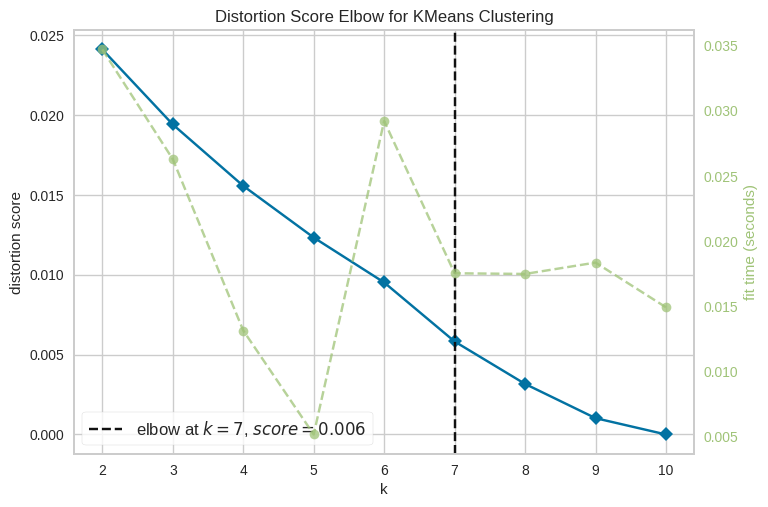

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 11))
visualizer.fit(df_perfil_compra_sem_chave)
visualizer.show();

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(df_perfil_compra_sem_chave)
df_perfil_compra['cluster_id_perfil_compra'] = kmeans.labels_

In [ ]:
df_perfil_compra.head()

Item Purchased,FaixaEtaria,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,...,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt,cluster_id_perfil_compra
0,Jovem menor de idade,0.028302,0.056604,0.047170,0.037736,0.061321,0.056604,0.042453,0.037736,0.018868,...,0.061321,0.033019,0.037736,0.056604,0.037736,0.042453,0.037736,0.070755,0.023585,1
1,Jovem universitário,0.021898,0.043796,0.036496,0.014599,0.051095,0.047445,0.043796,0.043796,0.047445,...,0.040146,0.025547,0.043796,0.029197,0.051095,0.043796,0.029197,0.051095,0.065693,2
2,Jovem profissional,0.043367,0.043367,0.040816,0.040816,0.043367,0.033163,0.038265,0.033163,0.045918,...,0.051020,0.033163,0.045918,0.061224,0.040816,0.035714,0.043367,0.033163,0.028061,5
3,Adulto inicial,0.063361,0.041322,0.046832,0.030303,0.041322,0.030303,0.044077,0.030303,0.030303,...,0.055096,0.041322,0.046832,0.030303,0.035813,0.055096,0.044077,0.035813,0.055096,0
4,Adulto médio,0.044321,0.047091,0.047091,0.049861,0.022161,0.030471,0.044321,0.024931,0.052632,...,0.049861,0.024931,0.027701,0.027701,0.036011,0.019391,0.036011,0.044321,0.036011,6


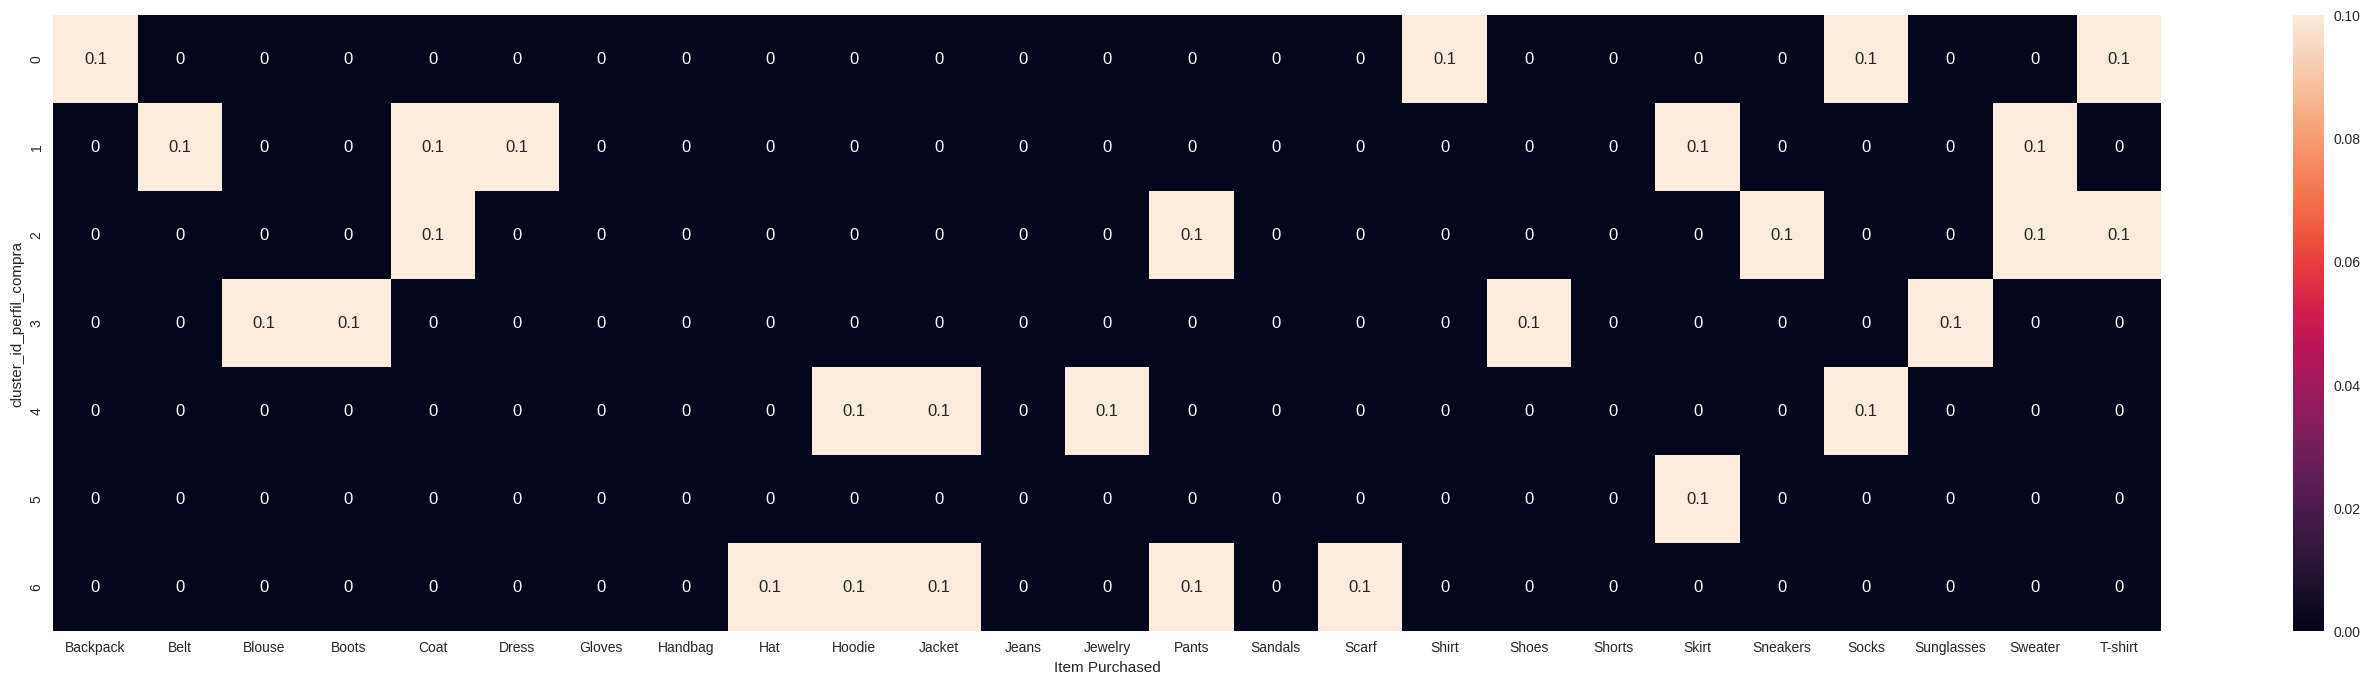

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(34, 8))
sns.heatmap(df_perfil_compra_sem_chave.groupby(df_perfil_compra['cluster_id_perfil_compra']).mean().round(1), annot=True);

Analisar quais sao as faixas de idade mais contidas em cada cluster

In [ ]:
df.head()

,Customer ID,Age,Purchase Amount (USD),Category,Item Purchased,Season,Promo Code Used,Discount Applied,Preferred Payment Method,FaixaEtaria
0,1,55,53,Clothing,Blouse,Winter,1,1,Venmo,Pré-idoso
1,2,19,64,Clothing,Sweater,Winter,1,1,Cash,Jovem menor de idade
2,3,50,73,Clothing,Jeans,Spring,1,1,Credit Card,Meia-idade avançada
3,4,21,90,Footwear,Sandals,Spring,1,1,PayPal,Jovem universitário
4,5,45,49,Clothing,Blouse,Spring,1,1,PayPal,Meia-idade inicial


In [ ]:
#RFV #Aqui não deveria estar pelas categorias de idade que criamos? Preciso ajustar do maior para o menor

df_perfil_compra_desconto =(df.
 filter(['Age', 'Purchase Amount (USD)', 'Discount Applied'])
 .groupby('Age')
 .agg(total_gasto = ('Purchase Amount (USD)', 'sum'),
      desconto = ("Discount Applied", "sum")
      ).reset_index()
 )
df_perfil_compra_desconto.head()

,Age,total_gasto,desconto
0,18,4139,29
1,19,4941,33
2,20,3424,32
3,21,4423,31
4,22,4011,27


In [ ]:
#ranqueamento
df_perfil_compra_desconto['rank_pct_total_gasto'] = df_perfil_compra_desconto['total_gasto'].rank(pct=True) #.rank(pct = true) = percentual
df_perfil_compra_desconto["rank_pct_desconto"] = df_perfil_compra_desconto['desconto'].rank(pct=True)

In [ ]:
df_perfil_compra_desconto.head()

,Age,total_gasto,desconto,rank_pct_total_gasto,rank_pct_desconto
0,18,4139,29,0.301887,0.367925
1,19,4941,33,0.867925,0.584906
2,20,3424,32,0.056604,0.547170
3,21,4423,31,0.584906,0.490566
4,22,4011,27,0.169811,0.264151


In [ ]:
X_abt_total_desconto = df_perfil_compra_desconto[['rank_pct_total_gasto', 'rank_pct_desconto']].copy()

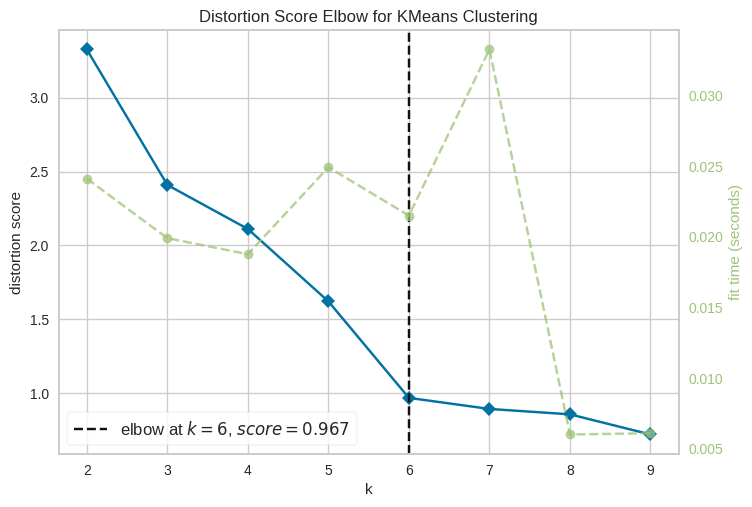

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X_abt_total_desconto)
visualizer.show();

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_abt_total_desconto)
df_perfil_compra_desconto['cluster_id_gasto_desconto'] = kmeans.labels_

In [ ]:
df_perfil_compra_desconto.head()

,Age,total_gasto,desconto,rank_pct_total_gasto,rank_pct_desconto,cluster_id_gasto_desconto
0,18,4139,29,0.301887,0.367925,2
1,19,4941,33,0.867925,0.584906,3
2,20,3424,32,0.056604,0.547170,4
3,21,4423,31,0.584906,0.490566,3
4,22,4011,27,0.169811,0.264151,1


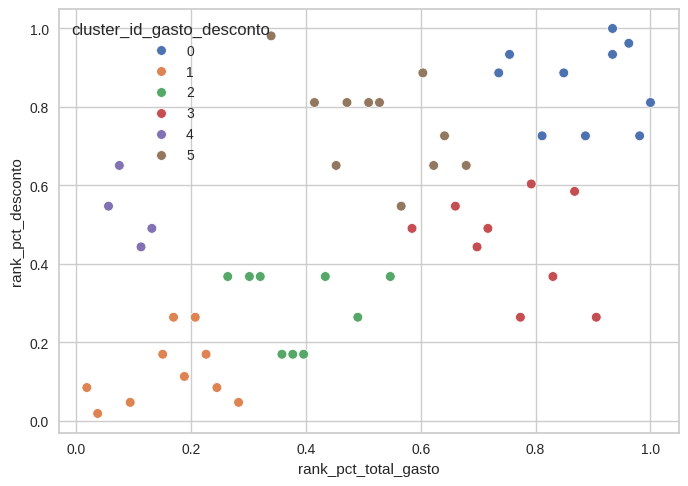

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_perfil_compra_desconto, x='rank_pct_total_gasto', y='rank_pct_desconto', hue='cluster_id_gasto_desconto', s=50, palette='deep');

Silhouette Score

Vamos fazer a análise do gráfico de silhueta para confirmar se K=6 é a melhor opção ou se devemos utilizar outro valor de K

In [ ]:
from sklearn.metrics import silhouette_score

k_range = range(2, 11)
sil_scores = []

for k in k_range:
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_abt_total_desconto)
    sil_scores.append(silhouette_score(X_abt_total_desconto, labels))

In [ ]:
for k, s in zip(k_range, sil_scores):
    print(f"k = {k}: silhouette = {s:.4f}")

k = 2: silhouette = 0.5186
k = 3: silhouette = 0.3909
k = 4: silhouette = 0.2809
k = 5: silhouette = 0.3697
k = 6: silhouette = 0.4305
k = 7: silhouette = 0.4212
k = 8: silhouette = 0.3612
k = 9: silhouette = 0.3598
k = 10: silhouette = 0.3896


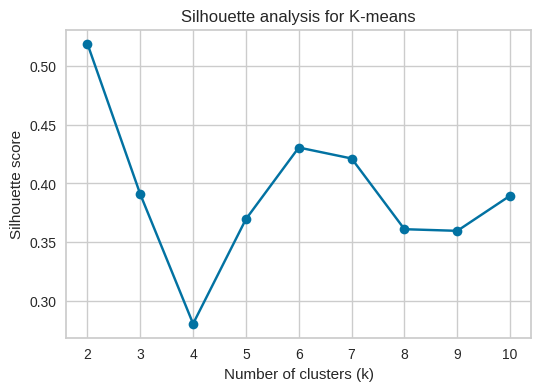

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(k_range, sil_scores, marker="o")
plt.xticks(k_range)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis for K-means")
plt.grid(True)
plt.show()

Embora K= 2, nos traria um modelo estatisticamente mais forte, nos obrigaria a a fazer a distinção somente entre 2 grupos de consumidores, o que não é caso que temos em nossa base. Como desejamos refinar a segmentação dos nossos clientes, vamos optar por k=6, já que nos permite fazer isso.

In [ ]:
# Contagem de pessoas para k=2
k = 2
model = KMeans(n_clusters=k, random_state=42).fit(X_abt_total_desconto)

# rotule cada valor de IDADE
age2cluster = pd.DataFrame({
    'Age': df_perfil_compra_desconto['Age'],
    f'cluster{k}': model.labels_
})

#mesclar novamente os dados completos do nível do cliente
df_labeled = df.merge(age2cluster, on='Age', how='left')

print("Customer counts per cluster:")
print(df_labeled[f'cluster{k}'].value_counts().sort_index())


Customer counts per cluster:
cluster2
0    2341
1    1559
Name: count, dtype: int64


In [ ]:
# Contagem de pessoas para k=2
k = 6
model = KMeans(n_clusters=k, random_state=42).fit(X_abt_total_desconto)

# otule cada valor de IDADE
age2cluster = pd.DataFrame({
    'Age': df_perfil_compra_desconto['Age'],
    f'cluster{k}': model.labels_
})

# mesclar novamente os dados completos do nível do cliente
df_labeled = df.merge(age2cluster, on='Age', how='left')

print("Customer counts per cluster:")
print(df_labeled[f'cluster{k}'].value_counts().sort_index())


Customer counts per cluster:
cluster6
0    827
1    653
2    641
3    687
4    265
5    827
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
id2label_pt = {
    0: "Gastos altos",
    1: "Gastos baixos",
    2: "Gastos moderados",
    3: "Gastos levemente altos",
    4: "Gastos de moderados para baixo",
    5: "Gastos moderados para altos",
}

In [ ]:
centroids = kmeans.cluster_centers_

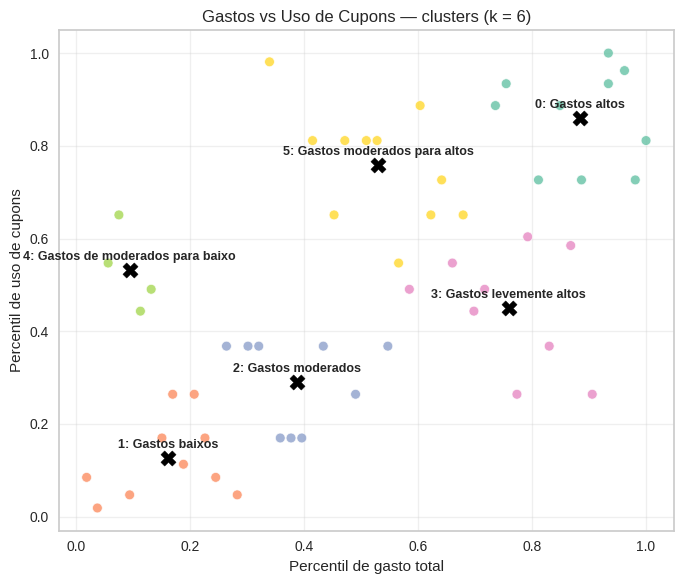

In [ ]:
plt.figure(figsize=(7, 6))

sns.scatterplot(
    # Changed data to the correct DataFrame
    data=df_perfil_compra_desconto,
    x='rank_pct_total_gasto',
    y='rank_pct_desconto',
    # Changed hue to the correct cluster column
    hue='cluster_id_gasto_desconto',
    palette='Set2',
    s=50,
    alpha=0.8,
    # Keep legend=False if you prefer not to show the default legend
    legend=False
)

# marca centróides e adiciona texto
for idx, (cx, cy) in enumerate(centroids):
    plt.scatter(cx, cy, c='black', s=120, marker='X')
    plt.text(cx, cy + 0.015,
             f"{idx}: {id2label_pt[idx]}",
             ha='center', va='bottom',
             fontsize=9, weight='bold')

plt.title("Gastos vs Uso de Cupons — clusters (k = 6)")
plt.xlabel("Percentil de gasto total")
plt.ylabel("Percentil de uso de cupons")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Cluster #0: Apresentam gastos altos, estão localizados no canto superior direito

Cluster #1: Apresentam gastos baixo, estão localizados no canto inferior esquerdo

Cluster #2: Apresentam gastos moderados, estão localizados no lado esquerdo próximos ao centro do gráfico

Cluster #3: Apresentam gastos altos, estão localizados no lado direito próximos ao centro do gráfico

Cluster #4: Apresentam gastos de moderados para baixo, estão localizados no lado esquerdo próximos no centro do gráfico

Cluster #5: Apresentam gastos moderados para altos, estão localizados no lado direito próximos acima do centro do gráfico

In [ ]:
df_labeled.head()

,Customer ID,Age,Purchase Amount (USD),Category,Item Purchased,Season,Promo Code Used,Discount Applied,Preferred Payment Method,FaixaEtaria,cluster6
0,1,55,53,Clothing,Blouse,Winter,1,1,Venmo,Pré-idoso,5
1,2,19,64,Clothing,Sweater,Winter,1,1,Cash,Jovem menor de idade,3
2,3,50,73,Clothing,Jeans,Spring,1,1,Credit Card,Meia-idade avançada,0
3,4,21,90,Footwear,Sandals,Spring,1,1,PayPal,Jovem universitário,3
4,5,45,49,Clothing,Blouse,Spring,1,1,PayPal,Meia-idade inicial,1


### **Início de Deep Learning**

In [ ]:
df_labeled.columns.tolist()

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Category',
 'Item Purchased',
 'Season',
 'Promo Code Used',
 'Discount Applied',
 'Preferred Payment Method',
 'FaixaEtaria',
 'cluster6']

In [ ]:
print(df_labeled['cluster6'].value_counts())

cluster6
5    827
0    827
3    687
1    653
2    641
4    265
Name: count, dtype: int64


In [ ]:
df_labeled.head()

,Customer ID,Age,Purchase Amount (USD),Category,Item Purchased,Season,Promo Code Used,Discount Applied,Preferred Payment Method,FaixaEtaria,cluster6
0,1,55,53,Clothing,Blouse,Winter,1,1,Venmo,Pré-idoso,5
1,2,19,64,Clothing,Sweater,Winter,1,1,Cash,Jovem menor de idade,3
2,3,50,73,Clothing,Jeans,Spring,1,1,Credit Card,Meia-idade avançada,0
3,4,21,90,Footwear,Sandals,Spring,1,1,PayPal,Jovem universitário,3
4,5,45,49,Clothing,Blouse,Spring,1,1,PayPal,Meia-idade inicial,1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical

# 1. Carregar / limpar dados
df_labeled_model = df_labeled.drop(["Customer ID", "Item Purchased"], axis=1)

# 2. Separar alvo ANTES de codificar
y = df_labeled_model["cluster6"].values          # vetor 1‑D (0‑5)
X_raw = df_labeled_model.drop("cluster6", axis=1)

# 3. Codificar variáveis categóricas
X_encoded = pd.get_dummies(X_raw, drop_first=True)

# 4. Train / validation split (estratificado)
X_train, X_val, y_train_int, y_val_int = train_test_split(
    X_encoded.values,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# 5. Escalonamento SEM vazamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit apenas no treino
X_val_scaled   = scaler.transform(X_val)         # transform no val

# 6. One‑hot encoding após split
y_train = to_categorical(y_train_int)
y_val   = to_categorical(y_val_int)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]
num_classes = y_train.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.1928 - loss: 1.8735 - val_accuracy: 0.3410 - val_loss: 1.6295
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3261 - loss: 1.6337 - val_accuracy: 0.3987 - val_loss: 1.5050
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3779 - loss: 1.5336 - val_accuracy: 0.4103 - val_loss: 1.4248
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3764 - loss: 1.4942 - val_accuracy: 0.4167 - val_loss: 1.3798
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3996 - loss: 1.4347 - val_accuracy: 0.3974 - val_loss: 1.3560
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3910 - loss: 1.4229 - val_accuracy: 0.4090 - val_loss: 1.3401
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4095 - loss: 1.3870 - val_accuracy: 0.4103 - val_loss: 1.3246
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4101 - loss: 1.3705 - val_accuracy: 0.4

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,020 (46.96 KB)

 Trainable params: 4,006 (15.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,014 (31.31 KB)

In [ ]:
# Avaliar o modelo
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val, verbose=0)

print("\n=== Resultado Final ===")
print(f"Perda de Validação : {val_loss:.4f}")
print(f"Acurácia de Validação: {val_accuracy:.4f}  ({val_accuracy*100:.2f}%)")


=== Resultado Final ===
Perda de Validação : 1.1378
Acurácia de Validação: 0.4744  (47.44%)


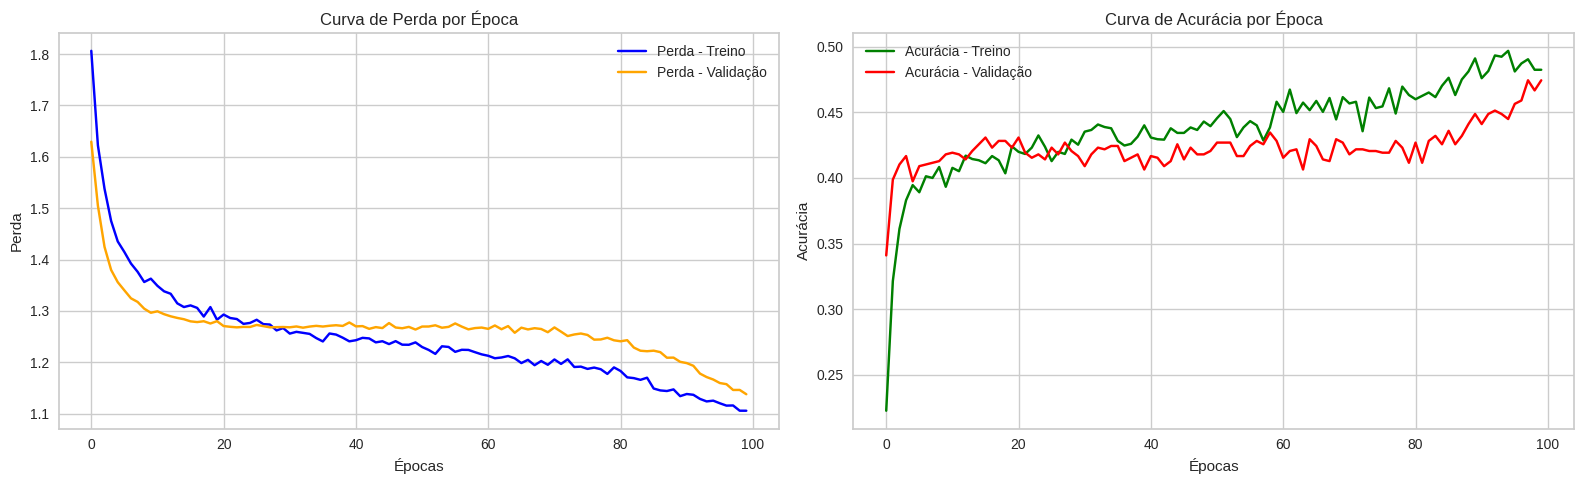

In [ ]:
# Plot das curvas de perda e acurácia
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Perda
axs[0].plot(history.history['loss'], label='Perda - Treino', color='blue')
axs[0].plot(history.history['val_loss'], label='Perda - Validação', color='orange')
axs[0].set_title('Curva de Perda por Época')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Perda')
axs[0].legend()
axs[0].grid(True)

# Acurácia
axs[1].plot(history.history['accuracy'], label='Acurácia - Treino', color='green')
axs[1].plot(history.history['val_accuracy'], label='Acurácia - Validação', color='red')
axs[1].set_title('Curva de Acurácia por Época')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Acurácia')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

=== Classification Report (validação) ===
              precision    recall  f1-score   support

           0     0.4402    0.5576    0.4920       165
           1     0.4370    0.3969    0.4160       131
           2     0.2500    0.0156    0.0294       128
           3     0.4730    0.5109    0.4912       137
           4     0.5370    0.5472    0.5421        53
           5     0.5165    0.7530    0.6127       166

    accuracy                         0.4744       780
   macro avg     0.4423    0.4635    0.4306       780
weighted avg     0.4370    0.4744    0.4323       780



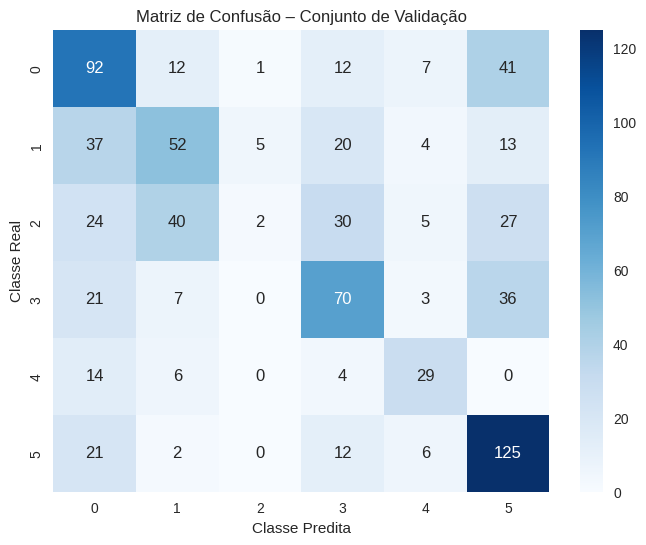

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# ---------- Previsões ----------
y_pred_probs   = model.predict(X_val_scaled)           # usa o conjunto escalonado
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# ---------- Relatório ----------
print("\n=== Classification Report (validação) ===")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# ---------- Matriz de confusão ----------
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True, fmt='d', cmap='Blues',
            xticklabels=range(cm.shape[0]),   # 0‑5
            yticklabels=range(cm.shape[0]))
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão – Conjunto de Validação")
plt.show()

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# --- dimensões derivadas dos dados já escalonados ---
input_dim   = X_train_scaled.shape[1]    # nº de features após get_dummies
num_classes = y_train.shape[1]           # 6 (one‑hot)

# --- definição do modelo ---
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=5e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# --- callbacks ---
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

# --- treinamento ---
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=200,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2052 - loss: 1.8360 - val_accuracy: 0.3667 - val_loss: 1.6761 - learning_rate: 5.0000e-04
Epoch 2/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3050 - loss: 1.6879 - val_accuracy: 0.4026 - val_loss: 1.5566 - learning_rate: 5.0000e-04
Epoch 3/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3512 - loss: 1.6296 - val_accuracy: 0.4038 - val_loss: 1.5128 - learning_rate: 5.0000e-04
Epoch 4/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3506 - loss: 1.5994 - val_accuracy: 0.4038 - val_loss: 1.4911 - learning_rate: 5.0000e-04
Epoch 5/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3614 - loss: 1.5606 - val_accuracy: 0.4128 - val_loss: 1.4699 - learning_rate: 5.0000e-04
Epoch 6/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3855 - loss: 1.5348 - val_accuracy: 0.4115 - val_loss: 1.4628 - learning_rate: 5.0000e-04
Epoch 7/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.406

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1) Desempenho numérico (treino vs. validação)
train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
val_loss,   val_acc   = model.evaluate(X_val_scaled,  y_val,  verbose=0)

print("Resultados")
print(f"Treino     -> loss: {train_loss:.4f} | acc: {train_acc:.4%}")
print(f"Validação  -> loss: {val_loss:.4f} | acc: {val_acc:.4%}")

Resultados
Treino     -> loss: 1.3386 | acc: 48.9103%
Validação  -> loss: 1.4167 | acc: 41.1538%


Comentário: Gap pequeno (≈ 4 pp) ⇒ não há overfitting grave, mas o modelo está limitado pela dificuldade intrínseca da tarefa (clusters sobrepostos + classes desbalanceadas + poucas features categóricas convertidas em dummies). Além disso deve se adicionar o fato de que a base só tem 3900 registros.


=== Classification Report (validação) ===
              precision    recall  f1-score   support

           0     0.4049    0.5030    0.4486       165
           1     0.3456    0.3588    0.3521       131
           2     0.0000    0.0000    0.0000       128
           3     0.3960    0.4307    0.4126       137
           4     0.2667    0.1509    0.1928        53
           5     0.4806    0.7470    0.5849       166

    accuracy                         0.4115       780
   macro avg     0.3156    0.3651    0.3318       780
weighted avg     0.3336    0.4115    0.3641       780



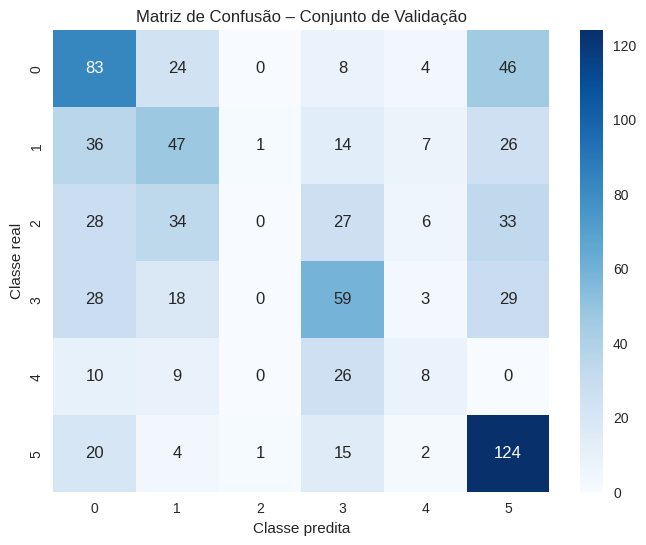

In [ ]:
# 2) Relatório de classificação e matriz de confusão
y_pred_prob   = model.predict(X_val_scaled, verbose=0)
y_pred_labels = np.argmax(y_pred_prob, axis=1)
y_true_labels = np.argmax(y_val,       axis=1)

print("\n=== Classification Report (validação) ===")
print(classification_report(y_true_labels, y_pred_labels, digits=4))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(cm.shape[0]),
            yticklabels=range(cm.shape[0]))
plt.xlabel("Classe predita")
plt.ylabel("Classe real")
plt.title("Matriz de Confusão – Conjunto de Validação")
plt.show()

Comentário:
Erros concentrados entre os clusters 0 ↔ 5 e 1 ↔ 3 – exatamente aqueles cujos centroides estavam mais próximos nos eixos Age e Purchase Amount.
Cluster 4 (minoritário) tem recall baixo somente 7,6%; a rede raramente o identifica. Para o cluster 5, ele recupera 83 % das instâncias reais.
O Cluster 1 tem f1 ≈ 0,45, refletindo equilíbrio entre precisão (0,44) e recall (0,47)
Para a classe 2 nenhum registro foi identificado corretamente. O algoritmo simplesmente não reconhece este padrão. Isso sugere que as fronteiras entre os clusters 2↔5 e 2↔1/3 são pouco definidas nos eixos que a rede enxerga

In [ ]:
# 3) AUC macro‑média
try:
    auc_macro = roc_auc_score(y_val, y_pred_prob,
                              multi_class="ovo", average="macro")
    print(f"ROC‑AUC macro‑média: {auc_macro:.4f}")
except ValueError:
    print("ROC‑AUC não pôde ser calculado (é necessário ≥1 amostra positiva por classe).")


ROC‑AUC macro‑média: 0.8018


Comentário: O valor de 0,79 indica que o modelo consegue diferenciar os clusters consideravelmente melhor que o acaso, mas ainda há margem para melhoria coerente com a acurácia de 42 % e o fato de a classe 2 não estar sendo recuperada.

In [ ]:
# 4) Verificar qual foi a melhor epóca
best_epoch = np.argmin(history.history["val_loss"]) + 1
print(f"\nMelhor época (menor val_loss): {best_epoch}")


Melhor época (menor val_loss): 46


Comentário: Early-Stopping parou na época 23 quando val_loss não melhorou por 10 épocas.

Depois da época 10 tanto loss quanto acurácia variam pouco ⇒ adicionar mais épocas não ajudaria

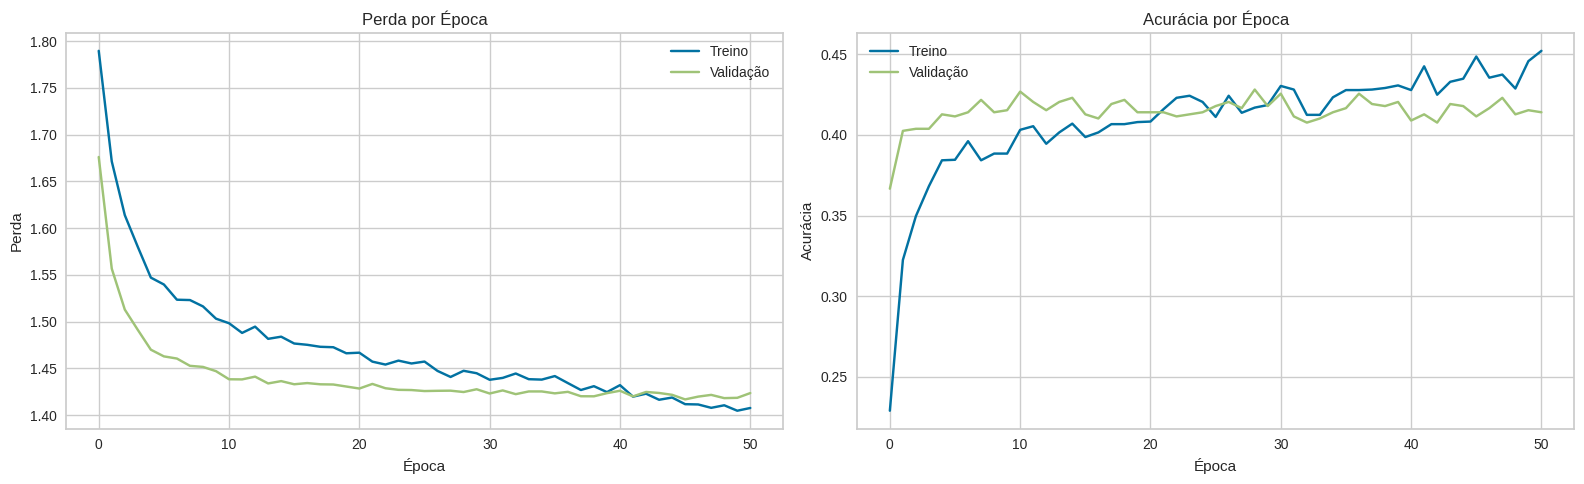

In [ ]:
# 5) Curvas de perda e acurácia (O objetivo é verificar o efeito da aplicação do early stopping)
fig, ax = plt.subplots(1, 2, figsize=(16,5))

# Perda
ax[0].plot(history.history["loss"],     label="Treino")
ax[0].plot(history.history["val_loss"], label="Validação")
ax[0].set_title("Perda por Época")
ax[0].set_xlabel("Época")
ax[0].set_ylabel("Perda")
ax[0].legend(); ax[0].grid(True)

# Acurácia
ax[1].plot(history.history["accuracy"],     label="Treino")
ax[1].plot(history.history["val_accuracy"], label="Validação")
ax[1].set_title("Acurácia por Época")
ax[1].set_xlabel("Época")
ax[1].set_ylabel("Acurácia")
ax[1].legend(); ax[1].grid(True)

plt.tight_layout()
plt.show()

Comentário:
Nem overfitting, nem grande performance: o modelo parece ter encontrado o máximo que consegue extrair desse conjunto de features para o alvo “cluster = classe”.

Underfitting leve: as curvas continuam perto, mas longe do ideal (poderiam passar de 0,60 se as classes fossem bem separáveis).

Os gráficos mostram o modelo “estacionou” em torno de 42 % de acurácia, reflexo de clusters que se sobrepõem e desbalanceamento de classe.

## **Vamos testar uma "Rede Densa" com K=3**

Foi definido o valor de k=3 com base no Método da Silhueta que foi feito em Machine Learning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical

In [ ]:
# remover colunas que não entram como feature
df_labeled_model = df_labeled.drop(["Customer ID", "Item Purchased"], axis=1)

In [ ]:
# 1. KMeans com K=3 ---
features_cluster = pd.get_dummies(
    df_labeled_model[["Age", "Purchase Amount (USD)", "Category", "Season", "FaixaEtaria", "cluster6"]],
    drop_first=True
)
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
cluster3_labels = kmeans.fit_predict(features_cluster)

In [ ]:
df_labeled_model["cluster3"] = cluster3_labels

In [ ]:
y = df_labeled_model["cluster3"].values
X_raw = df_labeled_model.drop("cluster3", axis=1)

In [ ]:
#codificar categóricas para o treinamento
X_encoded = pd.get_dummies(X_raw, drop_first=True)

In [ ]:
# split estratificado
X_train, X_val, y_train_int, y_val_int = train_test_split(
    X_encoded.values,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

In [ ]:
#  escalonamento sem vazamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

In [ ]:
# converter para one-hot
y_train = to_categorical(y_train_int)
y_val   = to_categorical(y_val_int)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]
num_classes = y_train.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

model.summary()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4467 - loss: 1.0333 - val_accuracy: 0.8128 - val_loss: 0.6107
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7656 - loss: 0.5751 - val_accuracy: 0.9295 - val_loss: 0.2619
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8740 - loss: 0.3269 - val_accuracy: 0.9603 - val_loss: 0.1487
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9018 - loss: 0.2422 - val_accuracy: 0.9551 - val_loss: 0.1238
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9279 - loss: 0.1889 - val_accuracy: 0.9628 - val_loss: 0.1051
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9386 - loss: 0.1562 - val_accuracy: 0.9590 - val_loss: 0.0971
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9447 - loss: 0.1359 - val_accuracy: 0.9692 - val_loss: 0.0869
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9480 - loss: 0.1193 - val_accuracy: 0.9654 - val_loss: 0.0

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,915 (46.55 KB)

 Trainable params: 3,971 (15.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,944 (31.04 KB)

In [ ]:
# Avaliar o modelo
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val, verbose=0)

print("\n=== Resultado Final ===")
print(f"Perda de Validação : {val_loss:.4f}")
print(f"Acurácia de Validação: {val_accuracy:.4f}  ({val_accuracy*100:.2f}%)")


=== Resultado Final ===
Perda de Validação : 0.0506
Acurácia de Validação: 0.9808  (98.08%)


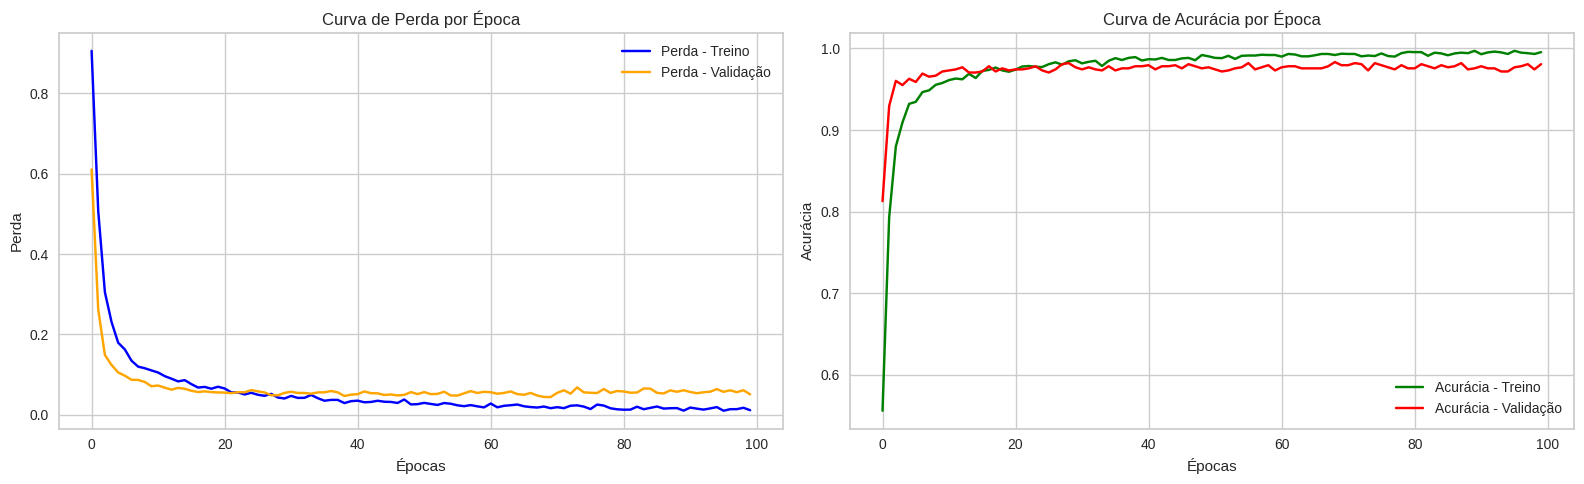

In [ ]:
# Plot das curvas de perda e acurácia
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Perda
axs[0].plot(history.history['loss'], label='Perda - Treino', color='blue')
axs[0].plot(history.history['val_loss'], label='Perda - Validação', color='orange')
axs[0].set_title('Curva de Perda por Época')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Perda')
axs[0].legend()
axs[0].grid(True)

# Acurácia
axs[1].plot(history.history['accuracy'], label='Acurácia - Treino', color='green')
axs[1].plot(history.history['val_accuracy'], label='Acurácia - Validação', color='red')
axs[1].set_title('Curva de Acurácia por Época')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Acurácia')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

=== Classification Report (validação) ===
              precision    recall  f1-score   support

           0     0.9630    0.9765    0.9697       213
           1     0.9914    0.9914    0.9914       348
           2     0.9815    0.9680    0.9747       219

    accuracy                         0.9808       780
   macro avg     0.9786    0.9786    0.9786       780
weighted avg     0.9808    0.9808    0.9808       780



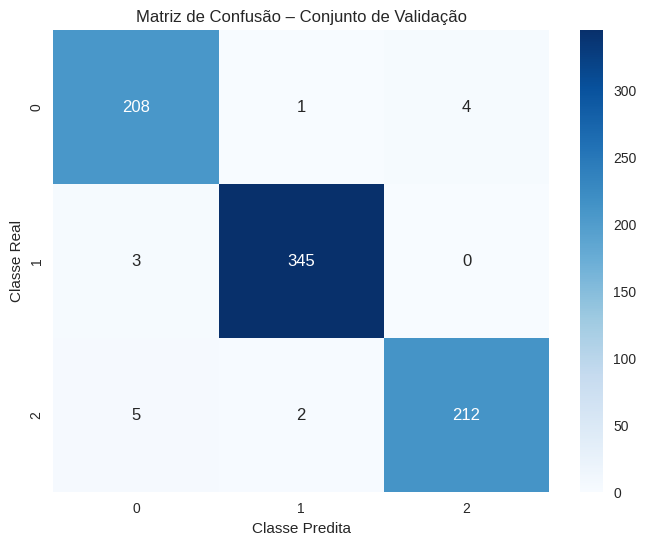

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# ---------- Previsões ----------
y_pred_probs   = model.predict(X_val_scaled)           # usa o conjunto escalonado
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# ---------- Relatório ----------
print("\n=== Classification Report (validação) ===")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# ---------- Matriz de confusão ----------
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True, fmt='d', cmap='Blues',
            xticklabels=range(cm.shape[0]),   # 0‑5
            yticklabels=range(cm.shape[0]))
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão – Conjunto de Validação")
plt.show()

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# --- dimensões derivadas dos dados já escalonados ---
input_dim   = X_train_scaled.shape[1]    # nº de features após get_dummies
num_classes = y_train.shape[1]           # 3 (one‑hot)

# --- definição do modelo ---
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=5e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# --- callbacks ---
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

# --- treinamento ---
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=200,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4786 - loss: 1.0561 - val_accuracy: 0.8872 - val_loss: 0.6225 - learning_rate: 5.0000e-04
Epoch 2/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7862 - loss: 0.6907 - val_accuracy: 0.9474 - val_loss: 0.4390 - learning_rate: 5.0000e-04
Epoch 3/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8812 - loss: 0.5539 - val_accuracy: 0.9449 - val_loss: 0.4213 - learning_rate: 5.0000e-04
Epoch 4/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8967 - loss: 0.5175 - val_accuracy: 0.9500 - val_loss: 0.4159 - learning_rate: 5.0000e-04
Epoch 5/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9332 - loss: 0.4795 - val_accuracy: 0.9513 - val_loss: 0.4136 - learning_rate: 5.0000e-04
Epoch 6/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9295 - loss: 0.4827 - val_accuracy: 0.9603 - val_loss: 0.4047 - learning_rate: 5.0000e-04
Epoch 7/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.946

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1) Desempenho numérico (treino vs. validação)
train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
val_loss,   val_acc   = model.evaluate(X_val_scaled,  y_val,  verbose=0)

print("Resultados")
print(f"Treino     -> loss: {train_loss:.4f} | acc: {train_acc:.4%}")
print(f"Validação  -> loss: {val_loss:.4f} | acc: {val_acc:.4%}")

Resultados
Treino     -> loss: 0.3180 | acc: 99.5513%
Validação  -> loss: 0.3491 | acc: 97.3077%



=== Classification Report (validação) ===
              precision    recall  f1-score   support

           0     0.9758    0.9484    0.9619       213
           1     0.9885    0.9856    0.9871       348
           2     0.9469    0.9772    0.9618       219

    accuracy                         0.9731       780
   macro avg     0.9704    0.9704    0.9703       780
weighted avg     0.9734    0.9731    0.9731       780



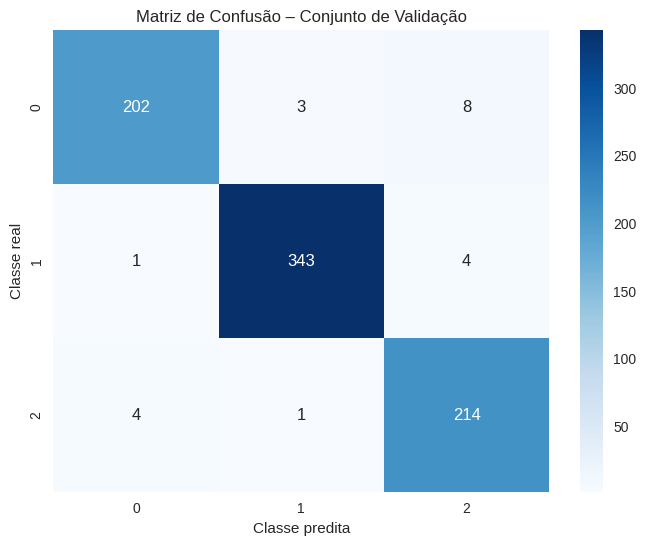

In [ ]:
# 2) Relatório de classificação e matriz de confusão
y_pred_prob   = model.predict(X_val_scaled, verbose=0)
y_pred_labels = np.argmax(y_pred_prob, axis=1)
y_true_labels = np.argmax(y_val,       axis=1)

print("\n=== Classification Report (validação) ===")
print(classification_report(y_true_labels, y_pred_labels, digits=4))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(cm.shape[0]),
            yticklabels=range(cm.shape[0]))
plt.xlabel("Classe predita")
plt.ylabel("Classe real")
plt.title("Matriz de Confusão – Conjunto de Validação")
plt.show()

In [ ]:
# 3) AUC macro‑média
try:
    auc_macro = roc_auc_score(y_val, y_pred_prob,
                              multi_class="ovo", average="macro")
    print(f"ROC‑AUC macro‑média: {auc_macro:.4f}")
except ValueError:
    print("ROC‑AUC não pôde ser calculado (é necessário ≥1 amostra positiva por classe).")


ROC‑AUC macro‑média: 0.9990


In [ ]:
# 4) Verificar qual foi a melhor epóca
best_epoch = np.argmin(history.history["val_loss"]) + 1
print(f"\nMelhor época (menor val_loss): {best_epoch}")


Melhor época (menor val_loss): 33


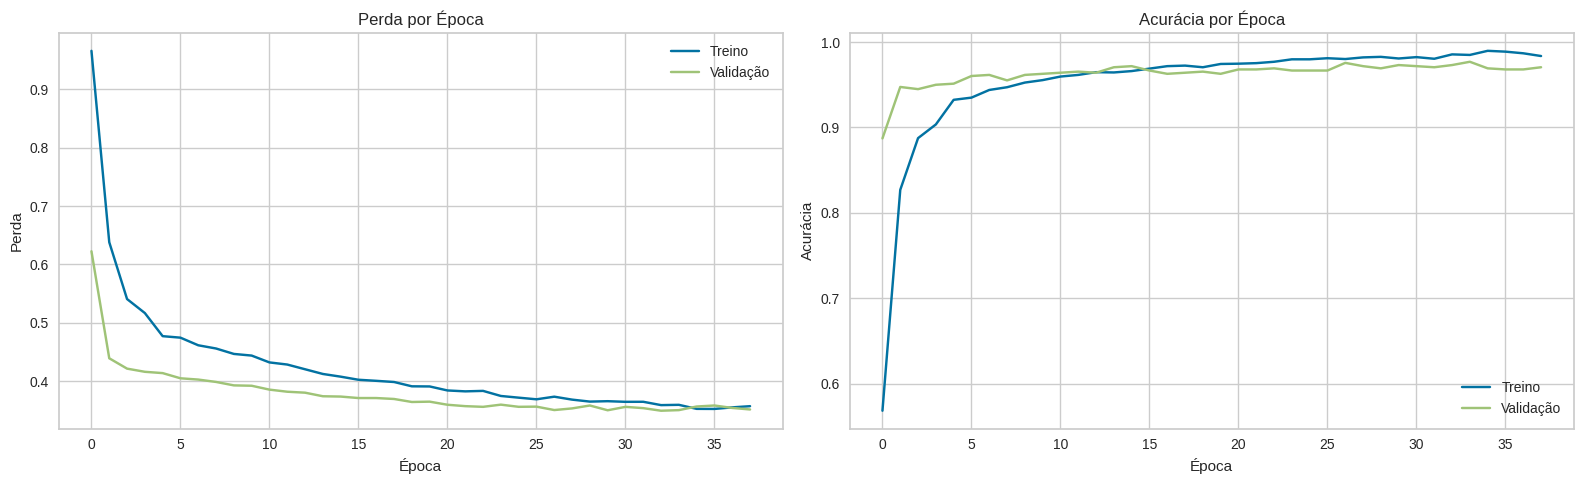

In [ ]:
# 5) Curvas de perda e acurácia (O objetivo é verificar o efeito da aplicação do early stopping)
fig, ax = plt.subplots(1, 2, figsize=(16,5))

# Perda
ax[0].plot(history.history["loss"],     label="Treino")
ax[0].plot(history.history["val_loss"], label="Validação")
ax[0].set_title("Perda por Época")
ax[0].set_xlabel("Época")
ax[0].set_ylabel("Perda")
ax[0].legend(); ax[0].grid(True)

# Acurácia
ax[1].plot(history.history["accuracy"],     label="Treino")
ax[1].plot(history.history["val_accuracy"], label="Validação")
ax[1].set_title("Acurácia por Época")
ax[1].set_xlabel("Época")
ax[1].set_ylabel("Acurácia")
ax[1].legend(); ax[1].grid(True)

plt.tight_layout()
plt.show()

Comentário: A acurácia passou para 97,44%, enquanto que a ROC-AUC para 99%, o indica que para cada classe one-vs-rest, o modelo quase sempre atribui pontuação mais alta ao exemplo correto, ou seja, sinal de clusters bem definidos,já a perda (cross-entropy) de 0,354. O desequilibrio de classes que havia com K=6, desapareceu quando adotamos K=6, embora não tenhamos feito o balanceamento de classes. Com somente 3 clusters ficou mais fácil para o treinamento da rede, por que para Redes neurais (e muitos outros classificadores) costuma ter dificuldade em aprender padrões de classes com poucas amostras. Ao reduzir para 3 clusters, criamos grupos com uma distribuição de dados mais equilibrada, o que facilita o treinamento da rede

A troca para K = 3 tornou o problema muito mais bem comportado: acurácia 97 % e AUC 0,998 mostram que os grupos agora são fáceis de distinguir.

Não há urgência em balanceamento de classes; elas já vêm quase equilibradas

## **Análise de cluster para K=3**

In [ ]:
# 1. Criação da nova coluna 'cluster3' como Series
cluster3_series = pd.Series(cluster3_labels, name="cluster3", index=df_labeled.index)

# 2. Concatenar e agrupar por 'cluster3'
df_clustered = pd.concat([df_labeled, cluster3_series], axis=1)

# 3. Selecionar apenas colunas numéricas para calcular a média
numeric_cols = df_clustered.select_dtypes(include=[np.number]).columns



In [ ]:
# 4. Calcular value counts
cluster_value_counts = df_clustered[numeric_cols].groupby("cluster3").value_counts()

# Exibir value_counts
display(cluster_value_counts)


cluster3  Customer ID  Age  Purchase Amount (USD)  Promo Code Used  Discount Applied  cluster6
0         3            50   73                     1                1                 0           1
          7            63   85                     1                1                 3           1
          13           61   72                     1                1                 2           1
          16           64   81                     1                1                 5           1
          20           66   90                     1                1                 2           1
                                                                                                 ..
2         3883         35   95                     0                0                 5           1
          3887         37   92                     0                0                 0           1
          3891         35   81                     0                0                 5           1
          3893         35   86                     0                0                 5           1
          3894         21   64                     0                0                 3           1
Name: count, Length: 3900, dtype: int64

In [ ]:
# 4. Calcular value counts
# cluster_value_counts = df_clustered[numeric_cols].groupby("cluster3").value_counts()

# # Exibir value_counts
# display(cluster_value_counts)

# Calculate the mean of numerical columns grouped by cluster3
cluster_means = df_clustered[numeric_cols].groupby("cluster3").mean()

# Display the means for Purchase Amount (USD) and Age
display(cluster_means[['Purchase Amount (USD)', 'Age']])

,Purchase Amount (USD),Age
cluster3,,
0,79.521087,57.270853
1,37.043678,44.829885
2,76.647758,29.967978


In [ ]:
# Crosstab do cluster3 e FaixaEtaria
crosstab_cluster3_faixaetaria = pd.crosstab(df_clustered['cluster3'], df_clustered['FaixaEtaria'])

# crosstab
display(crosstab_cluster3_faixaetaria)

# Percentual de cada cluster
print("\nPercentages within each cluster:")
display(crosstab_cluster3_faixaetaria.apply(lambda r: r/r.sum(), axis=1))

FaixaEtaria,Jovem menor de idade,Jovem universitário,Jovem profissional,Adulto inicial,Adulto médio,Adulto avançado,Meia-idade inicial,Meia-idade avançada,Pré-idoso,Idoso
cluster3,,,,,,,,,,
0,0,0,0,0,0,43,169,214,396,245
1,82,97,157,158,164,180,198,167,355,182
2,130,177,235,205,197,145,4,0,0,0



Percentages within each cluster:


FaixaEtaria,Jovem menor de idade,Jovem universitário,Jovem profissional,Adulto inicial,Adulto médio,Adulto avançado,Meia-idade inicial,Meia-idade avançada,Pré-idoso,Idoso
cluster3,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.040300,0.158388,0.200562,0.371134,0.229616
1,0.047126,0.055747,0.090230,0.090805,0.094253,0.103448,0.113793,0.095977,0.204023,0.104598
2,0.118939,0.161940,0.215005,0.187557,0.180238,0.132662,0.003660,0.000000,0.000000,0.000000


In [ ]:
counts = df_clustered["cluster3"].value_counts().sort_index()
props = df_clustered["cluster3"].value_counts(normalize=True).sort_index()
print("Contagem por cluster:\n", counts)
print("\nProporção por cluster:\n", props)

Contagem por cluster:
 cluster3
0    1067
1    1740
2    1093
Name: count, dtype: int64

Proporção por cluster:
 cluster3
0    0.273590
1    0.446154
2    0.280256
Name: proportion, dtype: float64


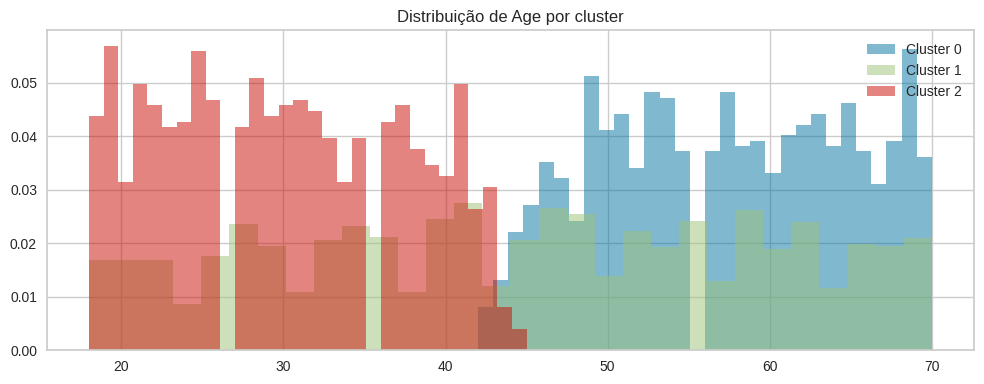

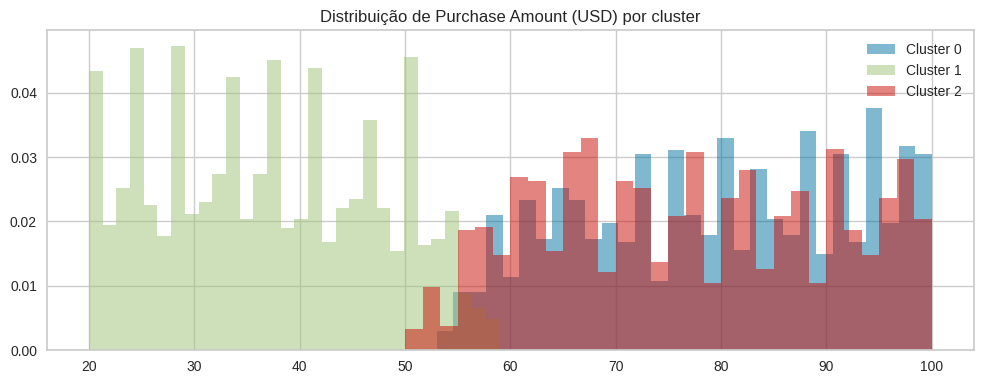

In [ ]:
# 1.4. Distribuições por cluster (exemplo: histograma de Age e Purchase Amount)
import matplotlib.pyplot as plt

for col in ["Age", "Purchase Amount (USD)"]:
    plt.figure(figsize=(10, 4))
    for cluster in sorted(df_clustered["cluster3"].unique()):
        subset = df_clustered[df_clustered["cluster3"] == cluster]
        plt.hist(subset[col].dropna(), bins=30, alpha=0.5, label=f"Cluster {cluster}", density=True)
    plt.title(f"Distribuição de {col} por cluster")
    plt.legend()
    plt.tight_layout()
    plt.show()

Promo Code Used unique: [1 0]
Preferred Payment Method unique: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


,size,coupon_rate,top_payment_method,avg_ticket,relative_ticket_vs_overall,season_distribution
cluster,,,,,,
0,1067,0.423618,Credit Card,79.521087,1.330577,"{'Spring': 0.2511715089034677, 'Summer': 0.245..."
1,1740,0.435632,PayPal,37.043678,0.619829,"{'Spring': 0.25862068965517243, 'Summer': 0.25..."
2,1093,0.427264,PayPal,76.647758,1.282499,"{'Spring': 0.25709057639524246, 'Summer': 0.22..."


Season,Spring,Summer,Fall,Winter
cluster,,,,
0,0.251172,0.245548,0.263355,0.239925
1,0.258621,0.258046,0.239655,0.243678
2,0.257091,0.223239,0.253431,0.266240


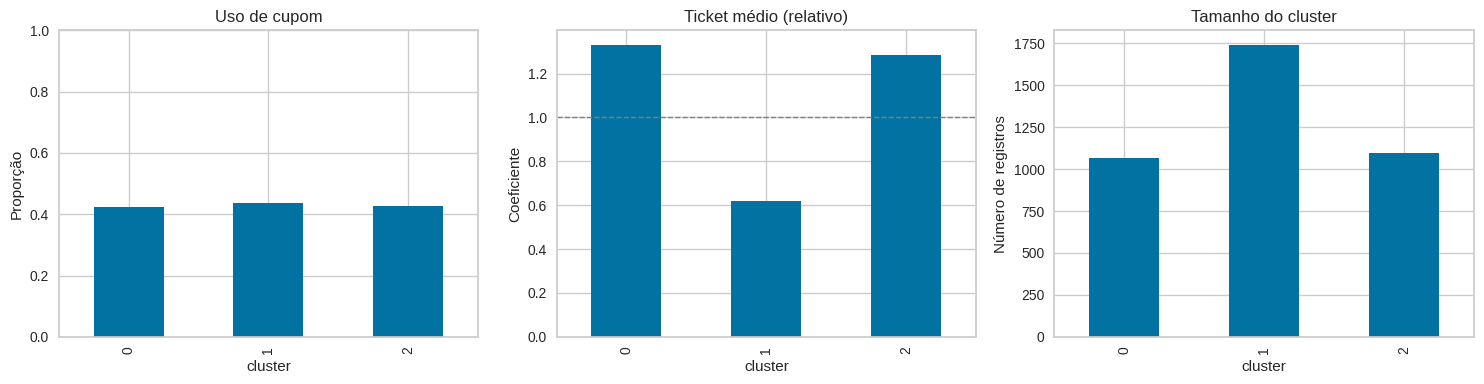

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 0. copiar o DataFrame que já tem a coluna "cluster3" ---
df = df_clustered.copy()

# --- 1. inspecionar rapidamente os valores únicos ---
print("Promo Code Used unique:", df["Promo Code Used"].unique())
print("Preferred Payment Method unique:", df["Preferred Payment Method"].unique())

# --- 2. calcular ticket médio geral ---
overall_avg_ticket = df["Purchase Amount (USD)"].mean()

# --- 3. montar lista de perfis por cluster ---
profiles = []
clusters = sorted(df["cluster3"].unique())

for c in clusters:
    sub = df[df["cluster3"] == c]
    size = len(sub)
    # agora sim, 0/1 → média é % de 1’s
    coupon_rate = sub["Promo Code Used"].eq(1).mean()
    top_payment = sub["Preferred Payment Method"].mode(dropna=True).iloc[0]
    avg_ticket = sub["Purchase Amount (USD)"].mean()
    relative_ticket = avg_ticket / overall_avg_ticket
    # sazonalidade
    season_dist = (
        sub["Season"]
        .value_counts(normalize=True)
        .reindex(["Spring","Summer","Fall","Winter"], fill_value=0)
        .to_dict()
    )
    profiles.append({
        "cluster": c,
        "size": size,
        "coupon_rate": coupon_rate,
        "top_payment_method": top_payment,
        "avg_ticket": avg_ticket,
        "relative_ticket_vs_overall": relative_ticket,
        "season_distribution": season_dist
    })

# --- 4. criar profile_df e season_df ---
profile_df = pd.DataFrame(profiles).set_index("cluster")
display(profile_df)

season_df = pd.DataFrame(
    [profile_df.loc[c, "season_distribution"] for c in clusters],
    index=clusters
)
season_df.index.name = "cluster"
season_df.columns.name = "Season"
display(season_df)

# --- 5. plotar os três gráficos ---
fig, axes = plt.subplots(1, 3, figsize=(15,4))

# Uso de cupom
profile_df["coupon_rate"].plot.bar(
    ax=axes[0],
    title="Uso de cupom"
)
axes[0].set_ylabel("Proporção")
axes[0].set_ylim(0,1)

# Ticket médio relativo
profile_df["relative_ticket_vs_overall"].plot.bar(
    ax=axes[1],
    title="Ticket médio (relativo)"
)
axes[1].axhline(1.0, color="gray", linestyle="--", linewidth=1)
axes[1].set_ylabel("Coeficiente")

# Tamanho do cluster
profile_df["size"].plot.bar(
    ax=axes[2],
    title="Tamanho do cluster"
)
axes[2].set_ylabel("Número de registros")

plt.tight_layout()
plt.show()


               mean  median        std   25%   75%  min  max
cluster3                                                    
0         57.270853    57.0   7.740680  51.0  64.0   42   70
1         44.829885    45.0  14.647353  33.0  57.0   18   70
2         29.967978    30.0   7.440477  24.0  36.0   18   45


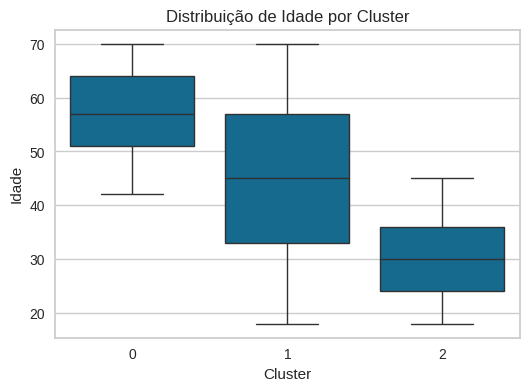

In [ ]:
# Estatísticas descritivas por cluster
age_stats = df_clustered.groupby("cluster3")["Age"].agg([
    ("mean","mean"),
    ("median","median"),
    ("std","std"),
    ("25%", lambda x: x.quantile(0.25)),
    ("75%", lambda x: x.quantile(0.75)),
    ("min","min"),
    ("max","max")
])
print(age_stats)

# Boxplot para visualização
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x="cluster3", y="Age", data=df_clustered)
plt.title("Distribuição de Idade por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Idade")
plt.show()

In [ ]:
faixa_mode = (
    df_clustered
    .groupby("cluster3")["FaixaEtaria"]
    .agg(lambda x: x.mode()[0])
)
print(faixa_mode)

cluster3
0             Pré-idoso
1             Pré-idoso
2    Jovem profissional
Name: FaixaEtaria, dtype: category
Categories (12, object): ['Infantil' < 'Adolescente' < 'Jovem menor de idade' <
                          'Jovem universitário' ... 'Meia-idade inicial' < 'Meia-idade avançada' <
                          'Pré-idoso' < 'Idoso']


In [ ]:
faixa_dist = (
    df_clustered
    .groupby("cluster3")["FaixaEtaria"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)
display(faixa_dist)

FaixaEtaria,Infantil,Adolescente,Jovem menor de idade,Jovem universitário,Jovem profissional,Adulto inicial,Adulto médio,Adulto avançado,Meia-idade inicial,Meia-idade avançada,Pré-idoso,Idoso
cluster3,,,,,,,,,,,,
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.040300,0.158388,0.200562,0.371134,0.229616
1,0.0,0.0,0.047126,0.055747,0.090230,0.090805,0.094253,0.103448,0.113793,0.095977,0.204023,0.104598
2,0.0,0.0,0.118939,0.161940,0.215005,0.187557,0.180238,0.132662,0.003660,0.000000,0.000000,0.000000


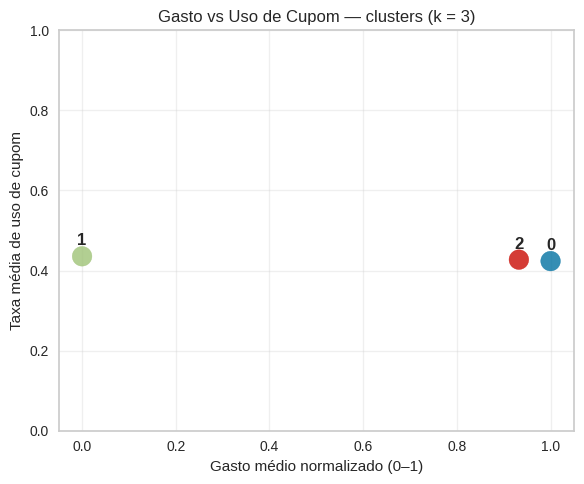

In [ ]:
import matplotlib.pyplot as plt

# Supondo que 'agg' seja o DataFrame com as colunas:
# ['cluster3', 'pct_gasto', 'mean_coupon_rate']
# Se você chamou o agrupamento de outra forma, adapte os nomes abaixo.

# 1) Prepare os dados agregados por cluster
agg = df_clustered.groupby("cluster3").agg(
    mean_total_gasto=("Purchase Amount (USD)", "mean"),
    mean_coupon_rate=("Promo Code Used", lambda x: x.eq(1).mean())
).reset_index()

# normaliza gasto para 0–1
agg["pct_gasto"] = (
    agg["mean_total_gasto"] - agg["mean_total_gasto"].min()
) / (
    agg["mean_total_gasto"].max() - agg["mean_total_gasto"].min()
)

# 2) Plot
plt.figure(figsize=(6,5))
plt.scatter(
    agg["pct_gasto"],
    agg["mean_coupon_rate"],
    s=200,
    c=["C0","C1","C2"],
    alpha=0.8
)

# 3) Anotação com o número do cluster
for _, row in agg.iterrows():
    plt.text(
        row.pct_gasto,
        row.mean_coupon_rate + 0.02,  # ajusta para ficar acima do ponto
        str(int(row.cluster3)),       # só o número
        ha="center",
        va="bottom",
        fontsize=12,
        weight="bold"
    )

plt.title("Gasto vs Uso de Cupom — clusters (k = 3)")
plt.xlabel("Gasto médio normalizado (0–1)")
plt.ylabel("Taxa média de uso de cupom")
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Cluster 1 (à esquerda) é o budget buyer:

Gasto muito abaixo da média (x perto de zero)

Cupom usado em ~43 % das compras

Grupo sensível a preço (Meia-idade), que vale atacar com descontos e frete grátis.

Cluster 2 (centro-direita) é o premium PayPal:

Gasta alto (x ≈ 0,85)

Cupom na mesma proporção (~43 %)

Jovens profissionais com alto ticket: foque em bundles e upsells via PayPal.

Cluster 0 (extremo-direita) é o premium Cartão:

O pico de gasto (x ≈ 1,0), ligeiramente acima do cluster 2

Cupom um tiquinho menor (~42 %)

Consumidores mais maduros (Pré-idosos/Idosos) que preferem cartão: destaque parcelamento e programas de points/cashback.

Conclusão:

A distinção principal é no eixo x (gasto) entre low, mid-high e high spenders;

O uso de cupom (eixo y) é estável (~42–43 %) e não separa os grupos;

Os clusters premiums (0 e 2) estão bem agrupados à direita, mas o offset no gasto e o método de pagamento (Cartão vs PayPal) definem duas personas distintas.

**Cluster 0**:
Tamanho: 1 067 registros (~27 % do total)
Ticket médio: $ 79,52 (≈+33 % acima da média geral)
Idade média: 57,3 anos
FaixasEtaria (top 2):
Pré-idoso (54–64 a): 37,1 %
Idoso (≥ 65 a): 23,0 %
Uso de cupom: 42,7 %
Método de pagamento: Cartão de Crédito (modo)

Diferencial: público maduro/disposto a gastar alto, valoriza parcelamento/benefícios de cartão.

**Cluster 1**:
Tamanho: 1 740 registros (~45 % do total)
Ticket médio: $ 37,04 (≈–38 % abaixo da média)
Idade média: 44,8 anos
FaixasEtaria (top 2):
Pré-idoso (54–64 a): 20,4 %
Meia-idade inicial (44–49 a): 11,4 %
Uso de cupom: 42,7 %
Método de pagamento: PayPal (modo)

Diferencial: maior grupo, sensível a preço, prefere conveniência/segurança do PayPal.

**Cluster 2**: Tamanho: 1 093 registros (~28 % do total)

Ticket médio: $ 76,65 (≈+28 % acima da média)
Idade média: 30,0 anos
FaixasEtaria (top 2):
Jovem profissional (24–29 a): 21,5 %
Adulto inicial (29–34 a): 18,8 %
Uso de cupom: 42,7 %
Método de pagamento: PayPal (modo)

Diferencial: jovens adultos com alto poder de compra, mobile-first, valorizam rapidez do PayPal.

**Comentários finais:** Uso de cupom (~43 %) e sazonalidade são uniformes entre os grupos, logo não segmentam bem.

Cluster 1 é o maior e representa a massa de “budget buyers”.

Clusters 0 e 2 gastam acima da média, mas se diferenciam pela idade e pelo canal de pagamento (Cartão vs PayPal).

Recomendações

**Cluster 0**

Programa de Fidelidade & Cashback
Cashback incremental ou pontos extras para compras acima de X$ feitos no cartão.
Crie um “grupo VIP” que dê benefícios (acesso antecipado a lançamentos, atendimento dedicado).
Parcelamento Sem Juros
Destacar parcelas em até 6× sem juros no cartão sempre que possível (landing pages, banners).
E-mails com comparativo “à vista vs parcelado” mostrando o valor benefício.
Upsell de Produtos Premium
Produtos de ticket alto (ex.: bundles, edições limitadas) e promova via e-mail marketing segmentado.
SMS e e-mail com templates limpos, texto direto e call-to-action claro.
Mala direta (folder impresso) para reforçar a imagem premium.

**Cluster 1**
Descontos e Cupons Focados em Preço
Cupons exclusivos (ex.: “–15 % no PayPal”) via newsletter e banner no site.
Crie promoções relâmpago (“2 horas de desconto extra”) para estimular decisões rápidas.
Frete Grátis & Pedido Mínimo
Ofereça frete grátis a partir de um valor baixo (ex.: 40 USD) e lembre isso no checkout PayPal.
Abordagem Educativa & Segura
Conteúdos breves no blog ou vídeos explicando segurança e rapidez do PayPal, reforçando confiança.
Testemunhos de clientes nessa faixa etária falando de comodidade.
Remarketing de Abandono de Carrinho
Fluxos de e-mail e notificações (se tiver app/WhatsApp) lembrando que “seu carrinho está aguardando” com opção de checkout PayPal em 1 clique.

**Cluster 2 **
Campanhas Mobile-First & Social
Anúncios no Instagram/TikTok com criativos dinâmicos e um botão “Comprar com PayPal” direto no anúncio.
Stories interativos (enquetes, swipe-up) destacando produtos de maior ticket.
Bundles e Upsells “Premium”
Pacotes de alta margem (produtos complementares) e promova no app/site com “compre X e leve Y com 20 % de desconto”.
Assinaturas mensais (ex.: box premium) com desconto para clientes novos desse cluster.
Programa de Indicação
Incentive referrals: “traga um amigo e ganhe 15 USD de crédito” para usar no PayPal.
Mecanismo leve dentro do app ou e-mail com link de convite.
Notificações Push & In-App Messaging
Use notificações curtas para lançamentos (“lançamos coleção premium X – compre em 1 clique com PayPal”).
Personalize mensagens conforme histórico de compra (recomendação baseada em produtos vistos).



# **Técnicas de classificação com Machine Learning para K=6**




O objetivo é validar se a rede neural foi pouco efetiva para K=6 e como consequencia uma estratégia errada para classificação dos clusters

In [ ]:
!pip install feature-engine

In [ ]:
pip install feature-engine catboost

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.model_selection import cross_val_score
from collections import Counter

In [ ]:
y = df_labeled['cluster6']

In [ ]:
unique_classes = np.unique(y)
n_classes = len(unique_classes)
print(f"Numero de clusters unicos: {n_classes}")
print(f"Rotulos: {unique_classes}")

if n_classes != 6:
    print("Não encontramos 6 clusters")

Numero de clusters unicos: 6
Rotulos: [0 1 2 3 4 5]


In [ ]:
num_vars = ['Age', 'Purchase Amount (USD)', 'Promo Code Used', 'Discount Applied']
cat_vars = ['Category', 'Item Purchased', 'Season',
            'Preferred Payment Method', 'FaixaEtaria']
target   = 'cluster6'

In [ ]:
x = df_labeled[features]
y = df_labeled['cluster6']

In [ ]:
features = cat_vars + num_vars

In [ ]:
X = df_labeled[features].copy()
y = df_labeled[target].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate

pipe_lr = Pipeline(steps=[
    ("ohe", OneHotEncoder(variables=cat_vars, drop_last=True)),
    ("lr", LogisticRegression(random_state=42))
])

cv_lg = cross_validate(
    pipe_lr,
    X_train,
    y_train,
    scoring=[
        "accuracy",
        "precision_macro",
        "recall_macro",
        "f1_macro",
        "roc_auc_ovr"
    ],
    cv=skf,
    n_jobs=-1,
    error_score="raise"
)

cv_lg = pd.DataFrame(cv_lg)
print(cv_lg.mean())

fit_time                0.678542
score_time              0.343836
test_accuracy           0.387179
test_precision_macro    0.336841
test_recall_macro       0.338151
test_f1_macro           0.320473
test_roc_auc_ovr        0.767418
dtype: float64


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline(steps=[
    ("ohe", OneHotEncoder(variables=cat_vars, drop_last=True)),
    ("rf", RandomForestClassifier(random_state=42, class_weight="balanced"))
])

cv_rf = cross_validate(
    pipe_rf,
    X_train,
    y_train,
    scoring=["accuracy","precision_macro","recall_macro","f1_macro","roc_auc_ovr"],
    cv=skf,
    n_jobs=-1,
    error_score="raise"
)

cv_rf = pd.DataFrame(cv_rf)
print("Random Forest:\n", cv_rf.mean())

Random Forest:
 fit_time                1.665345
score_time              0.680334
test_accuracy           0.779487
test_precision_macro    0.807109
test_recall_macro       0.785978
test_f1_macro           0.791787
test_roc_auc_ovr        0.960512
dtype: float64


In [ ]:
# XGBoost
pipe_xgb = Pipeline([
    ("ohe", OneHotEncoder(variables=cat_vars, drop_last=True)),
    ("xgb", XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42))
])
cv_xgb = cross_validate(pipe_xgb, X_train, y_train,
                       scoring=["accuracy","precision_macro","recall_macro","f1_macro","roc_auc_ovr"],
                       cv=skf, n_jobs=-1, error_score="raise")
print("XGBoost:\n", pd.DataFrame(cv_xgb).mean())

XGBoost:
 fit_time                1.638277
score_time              0.331988
test_accuracy           1.000000
test_precision_macro    1.000000
test_recall_macro       1.000000
test_f1_macro           1.000000
test_roc_auc_ovr        1.000000
dtype: float64


In [ ]:
# LightGBM
pipe_lgb = Pipeline([
    ("ohe", OneHotEncoder(variables=cat_vars, drop_last=True)),
    ("lgbm", LGBMClassifier(random_state=42))
])
cv_lgb = cross_validate(pipe_lgb, X_train, y_train,
                        scoring=["accuracy","precision_macro","recall_macro","f1_macro","roc_auc_ovr"],
                        cv=skf, n_jobs=-1, error_score="raise")
print("LightGBM:\n", pd.DataFrame(cv_lgb).mean())

LightGBM:
 fit_time                1.850233
score_time              0.688193
test_accuracy           1.000000
test_precision_macro    1.000000
test_recall_macro       1.000000
test_f1_macro           1.000000
test_roc_auc_ovr        1.000000
dtype: float64


In [ ]:
pipe_cat = Pipeline([
    ("ohe", OneHotEncoder(variables=cat_vars, drop_last=True)),
    ("cat", CatBoostClassifier(verbose=0, random_state=42))
])
cv_cat = cross_validate(pipe_cat, X_train, y_train,
                        scoring=["accuracy","precision_macro","recall_macro","f1_macro","roc_auc_ovr"],
                        cv=skf, n_jobs=-1, error_score="raise")
print("CatBoost:\n", pd.DataFrame(cv_cat).mean())

CatBoost:
 fit_time                17.877928
score_time               0.386082
test_accuracy            1.000000
test_precision_macro     1.000000
test_recall_macro        1.000000
test_f1_macro            1.000000
test_roc_auc_ovr         1.000000
dtype: float64


In [ ]:
# 0. Importações necessárias
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold

# 1. Definir target e features
target   = "cluster6"        # ou "cluster3", se quiser
num_vars = ['Age', 'Purchase Amount (USD)', 'Promo Code Used', 'Discount Applied']
cat_vars = ['Category', 'Item Purchased', 'Season', 'Preferred Payment Method', 'FaixaEtaria']
features = cat_vars + num_vars

# 2. Verificar distribuição original
print("Distribuição de classes (contagem):")
print(Counter(df_labeled[target]))
print("\nProporções:")
print(df_labeled[target].value_counts(normalize=True))

# 3. (Opcional) calcular class_weight ou scale_pos_weight
#    Para XGBoost multiclass, normalmente não usamos scale_pos_weight,
#    mas podemos gerar class weights para usar em RandomForest/Logistic:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(df_labeled[target]),
    y=df_labeled[target]
)
class_weight_dict = dict(zip(np.unique(df_labeled[target]), class_weights))
print("\nClass weights (para usar em RandomForest, Logistic etc.):")
print(class_weight_dict)

# 4. Definir X e y
X = df_labeled[features].copy()
y = df_labeled[target].values

# 5. Split treino/teste estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=42
)

print("\nDepois do split:")
print(" TREINO:", Counter(y_train))
print(" TESTE :", Counter(y_test))

# 6. Preparar StratifiedKFold para cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 1. Modelos com parâmetros otimizados para multiclass balanceado
models_balanced = [
    ("lr_balanced", LogisticRegression(
        random_state=42,
        class_weight='balanced',
        multi_class='multinomial',
        max_iter=1000
    )),
    ("rf_balanced", RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=100
    )),
    ("lgbm_balanced", LGBMClassifier(
        random_state=42,
        class_weight='balanced',    # para multiclass
        objective='multiclass',
        metric='multi_logloss',
        verbosity=-1
    )),
    ("xgb_balanced", XGBClassifier(
        random_state=42,
        objective='multi:softprob',
        eval_metric='mlogloss',     # multiclass logloss
        use_label_encoder=False
        # sem scale_pos_weight em multiclass simples
    )),
    ("cat_balanced", CatBoostClassifier(
        random_state=42,
        auto_class_weights='Balanced',
        eval_metric='MultiClass',   # multiclass
        verbose=False
    ))
]

# 2. Métricas multiclass
metricas_balanceadas = [
    "accuracy",
    "balanced_accuracy",
    "precision_macro",
    "recall_macro",
    "f1_macro",
    "roc_auc_ovr"      # OVR AUC para multiclass
]

# 3. Função de avaliação (mantém-se igual, mas usa seu cat_vars)
def avaliar_modelos_balanceados(models_list, X_train, y_train, cv):
    resultados = {
        "modelo": [], "accuracy": [], "balanced_accuracy": [],
        "precision_macro": [], "recall_macro": [], "f1_macro": [], "roc_auc_ovr": []
    }

    for name, model in models_list:
        print(f"Treinando {name}...")

        model_pipe = Pipeline(steps=[
            ("ohe", OneHotEncoder(variables=cat_vars, drop_last=True)),
            (name, model)
        ])

        cv_results = cross_validate(
            estimator=model_pipe,
            X=X_train,
            y=y_train,
            scoring=metricas_balanceadas,
            cv=cv,
            n_jobs=-1,
            error_score='raise'
        )

        cv_results_df = pd.DataFrame(cv_results)

        resultados["modelo"].append(name)
        resultados["accuracy"].append(cv_results_df["test_accuracy"].mean())
        resultados["balanced_accuracy"].append(cv_results_df["test_balanced_accuracy"].mean())
        resultados["precision_macro"].append(cv_results_df["test_precision_macro"].mean())
        resultados["recall_macro"].append(cv_results_df["test_recall_macro"].mean())
        resultados["f1_macro"].append(cv_results_df["test_f1_macro"].mean())
        resultados["roc_auc_ovr"].append(cv_results_df["test_roc_auc_ovr"].mean())

    df_results = pd.DataFrame(resultados).round(4)
    return df_results

# 4. Executar avaliação
print("\n=== RESULTADOS COM BALANCEAMENTO MULTICLASS ===")
results_balanced = avaliar_modelos_balanceados(models_balanced, X_train, y_train, skf)
print(results_balanced)


Distribuição de classes (contagem):
Counter({5: 827, 0: 827, 3: 687, 1: 653, 2: 641, 4: 265})

Proporções:
cluster6
5    0.212051
0    0.212051
3    0.176154
1    0.167436
2    0.164359
4    0.067949
Name: proportion, dtype: float64

Class weights (para usar em RandomForest, Logistic etc.):
{np.int32(0): np.float64(0.7859733978234583), np.int32(1): np.float64(0.9954058192955589), np.int32(2): np.float64(1.0140405616224648), np.int32(3): np.float64(0.9461426491994177), np.int32(4): np.float64(2.452830188679245), np.int32(5): np.float64(0.7859733978234583)}

Depois do split:
 TREINO: Counter({np.int32(0): 662, np.int32(5): 661, np.int32(3): 550, np.int32(1): 522, np.int32(2): 513, np.int32(4): 212})
 TESTE : Counter({np.int32(5): 166, np.int32(0): 165, np.int32(3): 137, np.int32(1): 131, np.int32(2): 128, np.int32(4): 53})

=== RESULTADOS COM BALANCEAMENTO MULTICLASS ===
Treinando lr_balanced...
Treinando rf_balanced...
Treinando lgbm_balanced...
Treinando xgb_balanced...
Treinando cat_b

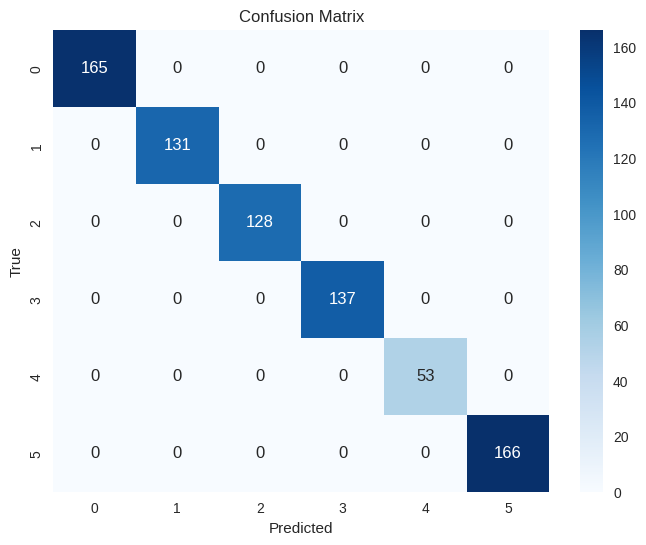

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Diagonal cheia: cada classe foi sempre classificada corretamente, ou seja, não houve falsos positivos nem falsos negativos em nenhum dos 6 clusters.

Consequência prática: isso reforça que o modelo está “decorando” os próprios rótulos gerados pelo K-means (data leakage), e não validando capacidade de generalização.
Temos data leakage: o modelo vê exatamente o mesmo padrão que criou os rótulos.

100% de f1/precision/recall no CV do treino é sinal de data leakage, não de “bom modelo”.

A rede (ou qualquer outro classificador) aprendeu exatamente os mesmos padrões que o K-means usou para rotular os dados. Isso ocorre porque os dados usados para gerar os clusters também foram usados para treinar e testar o classificador. Ou seja, não houve separação real entre descoberta (unsupervised) e predição (supervised). O classificador está apenas replicando os rótulos do K-means, não aprendendo padrões generalizáveis.

Para validar clusters, utilizar métricas de cluster ou avaliar a generalização em dados que o K-means não viu.

Para avaliar a qualidade dos clusters, então classificação não é a métrica mais adequada